# I. Load thư viện

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import math
import cv2
# Nhúng hình ảnh, đồ thị trong notebook
%matplotlib inline

In [2]:
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, regularizers
from keras.layers.noise import GaussianNoise
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.np_utils import to_categorical
K.set_image_dim_ordering('th')
#print(K.image_data_format())

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
## Sử dụng GPU
import tensorflow as tf
from keras.backend import tensorflow_backend
config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
session = tf.Session(config=config)
tensorflow_backend.set_session(session)

In [4]:
from keras.applications.imagenet_utils import decode_predictions

In [ ]:
from keras.models import load_model
model1=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/model1.h5')

In [ ]:
model2=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/model2.h5')
model3=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/model3.h5')
model4=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/model4.h5')
model5=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/model5.h5')
modelSig1=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelSig1.h5')
modelSig2=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelSig2.h5')
modelSig3=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelSig3.h5')
modelSig4=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelSig4.h5')
modelSig5=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelSig5.h5')
ChangeFiltermodel1=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/ChangeFiltermodel1.h5')
ChangeFiltermodel2=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/ChangeFiltermodel2.h5')
ChangeFiltermodel5=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/ChangeFiltermodel5.h5')
modelNumFilter1=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNumFilter1.h5')
modelNumFilter2=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNumFilter2.h5')
modelNumFilter5=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNumFilter5.h5')
modelNewLayer1=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewLayer1.h5')
modelNewLayer2=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewLayer2.h5')
modelNewLayer5=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewLayer5.h5')
modelNewBatchSize1=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewBatchSize1.h5')
modelNewBatchSize2=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewBatchSize2.h5')
modelNewBatchSize128_1=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewBatchSize128_1.h5')
modelNewBatchSize128_2=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewBatchSize128_2.h5')
modelNewLayer6=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewLayer6.h5')
modelNewLayer7=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewLayer7.h5')
modelNewLayer8=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewLayer8.h5')
modelDropout1=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelDropout1.h5')
modelDropout5=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelDropout5.h5')

# II. Xử lý dữ liệu hình ảnh

## 1. Đọc dữ liệu hình ảnh

### a. Lấy hình ảnh và tên trái cây

In [5]:
folder_train = 'F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/Fruit-Images-Dataset-master/Training/'
folder_test = 'F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/Fruit-Images-Dataset-master/Validation/'
#folder_train = 'F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/Training/'
#folder_test = 'F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/Validation/'

In [6]:
def HienThiHinhAnh1(folder,Hang, Cot, figsize=(20,10)):
    sequence_folder = glob.glob(os.path.join(folder, '*/*'))
    i=1
    demImage=0
    figs = plt.figure(figsize=figsize)
    NameImage=""
    #for sq in sequence_folder[start:end][:limit]:
    for sq in sequence_folder:
        sq = sq.replace('\\', '/')
        lables = sq.split('/')[-2]
        if NameImage != lables:
            NameImage = lables
            demImage=0
        if NameImage == lables:
            demImage+1
        if demImage < Cot:
            if i<(Hang*Cot):
                img = cv2.imread(sq,cv2.COLOR_BGR2RGB)
                # Pick the first image for each label.
                plt.subplot(Hang, Cot, i)  # A grid of 8 rows x 8 columns
                #print(i)
                plt.axis('off')
                plt.title(lables, fontsize=8)
                i += 1
                _ = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [7]:
def HienThiHinhAnh(folder,Hang, Cot,NumImage, figsize=(20,10)):
    sequence_folder = glob.glob(os.path.join(folder, '*/*'))
    i=1
    demImage=0
    figs = plt.figure(figsize=figsize)
    NameImage=""
    #for sq in sequence_folder[start:end][:limit]:
    for sq in sequence_folder:
        sq = sq.replace('\\', '/')
        lables = sq.split('/')[-2]
        if NameImage != lables:
            NameImage = lables
            demImage=0
        if NameImage == lables:
            demImage+=1
        if demImage < NumImage:
            if i<(Hang*Cot):
                img = cv2.imread(sq,cv2.COLOR_BGR2RGB)
                # Pick the first image for each label.
                plt.subplot(Hang, Cot, i)  # A grid of 8 rows x 8 columns
                #print(i)
                plt.axis('off')
                plt.title(lables, fontsize=8)
                i += 1
                _ = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

#### - Hiển thị ảnh sử dụng để Training

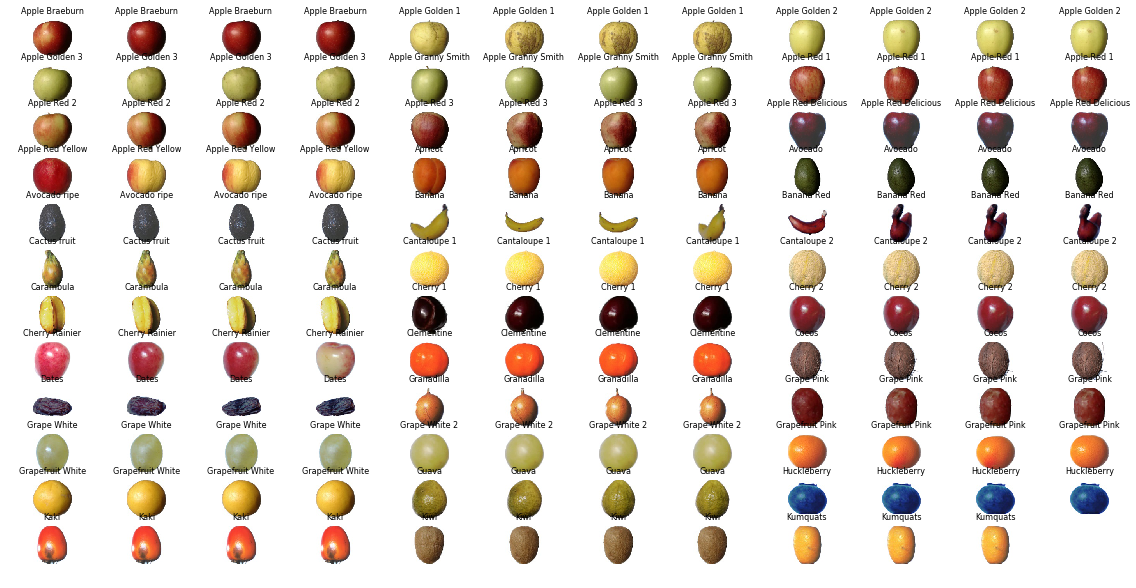

In [8]:
HienThiHinhAnh(folder_train,12,12,5)

- Mỗi loại trái cây khác nhau:
    + Có loại có hình dạng và màu sắc giống nhau ==> Rất khó phân biệt
    + Có loại có hình dạng và màu sắc khác nhau ==> Dễ phân biệt
- Trong cùng loại trái:
    + Hình dạng khác nhau
    + Màu sắc khác nhau
    + Kích thước trái khắc nhau

#### - Hiển thị ảnh sử dụng để Test 

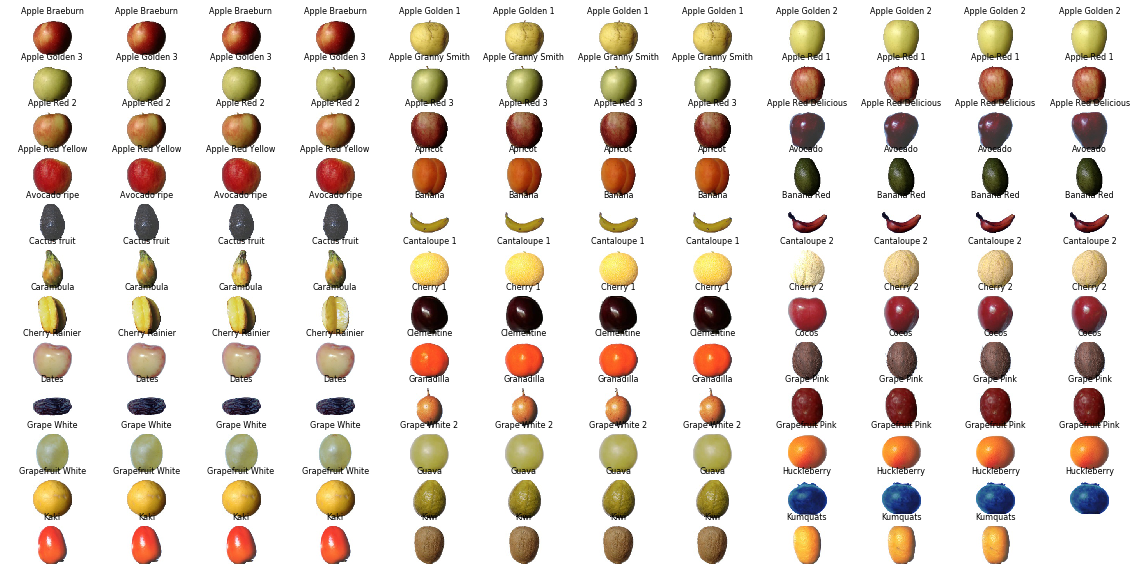

In [9]:
HienThiHinhAnh(folder_test,12,12,5)

In [10]:
image_size = 64

#### b. Lấy ảnh và cale dữ liệu hình ảnh (pixel) train và test về dạng [0,1]

In [11]:
def get_im(path):
    #Đọc dữ liệu ảnh màu sử dụng thư viện opencv
    #Hàm imread chuyển đổi hình ảnh sang mảng
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    #img = cv2.imread(path, cv2.COLOR_BGR2RGB)
    # resize ảnh về cùng kích thước
    resized = cv2.resize(img, (image_size, image_size))
    return resized

In [11]:
def load_sequence1(folder):
    sequence_folder = glob.glob(os.path.join(folder, '*/*'))
    X = []
    TenTraiCay = []
    for sq in sequence_folder:
        #print(sq.replace('\\', '/'))
        sq = sq.replace('\\', '/')
        lables = sq.split('/')[-2]
        img = get_im(sq)
        #img = img_to_array(img)
        X.append(img)
        TenTraiCay.append(lables)
    return np.array(X, dtype=np.uint8), np.asarray(TenTraiCay)

In [12]:
def load_sequence2(folder):
    sequence_folder = glob.glob(os.path.join(folder, '*/*'))
    X = []
    TenTraiCay = []
    for sq in sequence_folder:
        #print(sq.replace('\\', '/'))
        sq = sq.replace('\\', '/')
        lables = sq.split('/')[-2]
        img = get_im(sq)
        img = img_to_array(img)
        X.append(img)
        TenTraiCay.append(lables)
        dataX = np.array(X, dtype=np.uint8)
    return np.array(dataX, dtype="float") / 255.0, np.asarray(TenTraiCay)

In [13]:
def load_sequence(folder):
    sequence_folder = glob.glob(os.path.join(folder, '*/*'))
    X = []
    TenTraiCay = []
    for sq in sequence_folder:
        #print(sq.replace('\\', '/'))
        sq = sq.replace('\\', '/')
        lables = sq.split('/')[-2]
        img = get_im(sq)
        img = img_to_array(img)
        X.append(img)
        TenTraiCay.append(lables)
    return np.array(X, dtype=np.uint8), np.asarray(TenTraiCay)

In [13]:
x_train,y_train=load_sequence2(folder_train)
x_test,y_test=load_sequence2(folder_test)
print (x_train.shape)
print (x_test.shape)

(35133, 3, 64, 64)
(11804, 3, 64, 64)


In [14]:
d='F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/Train'
np.save(d,x_train)

In [15]:
d1='F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/Train_lables'
np.save(d1,y_train)

In [16]:
#np.load("F:\8_Machine Learning\Bai tap Deeplearning\2_CNN\Train.csv")

In [17]:
d2='F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/Test'
np.save(d2,x_test)

In [18]:
d3='F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/Test_labels'
np.save(d3,y_test)

In [12]:
x_train = np.load('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/DATA 64X64/Train.npy')
y_train = np.load('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/DATA 64X64/Train_lables.npy')

In [13]:
x_test = np.load('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/DATA 64X64/Test.npy')
y_test = np.load('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/DATA 64X64/Test_labels.npy')

In [14]:
TenTraiCay_Training = y_train

In [184]:
len(TenTraiCay_Training)

35133

In [186]:
def ConvertTenImage(TenTraiCay_Training):
    TenTraiCayPredict = []
    NameImagePre=""
    for ten in range(len(TenTraiCay_Training)):
        if NameImagePre != TenTraiCay_Training[ten]:
            NameImagePre = TenTraiCay_Training[ten]
            TenTraiCayPredict.append(NameImagePre)
    return np.asarray(TenTraiCayPredict)
            

In [188]:
TenTraiCaySuDungPredict = ConvertTenImage(TenTraiCay_Training)

In [189]:
len(TenTraiCaySuDungPredict)

70

In [15]:
num_classes = len(set(y_train))
print("Số trái cây cần phân loại: {0} ".format(len(set(y_train))))

Số trái cây cần phân loại: 70 


##### cale dữ liệu hình ảnh (pixel) train và test về dạng [0,1]

In [ ]:
x_train = np.array(x_train, dtype="float") / 255.0
x_test = np.array(x_test, dtype="float") / 255.0

### c. Chuyển đổi nhãn (Tên trái cây) sang mãng cho tập Train và Test

In [16]:
y_train = np.array(y_train)
y_test = np.array(y_test)

### d. Chuyển đổi label sang số

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
y_train = labelencoder_X.fit_transform(y_train)
y_test=labelencoder_X.transform(y_test)
#print (y_train)

### e. Chuyển đổi dữ liệu vector (int từ 0 đến 79) về ma trận lớp nhị phân (one-hot encoding)

In [18]:
# Cách 1 sử dụng keras
from keras import utils as np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
#y_train

In [19]:
# Cách 2 sử dụng sklearn
#from sklearn.preprocessing import LabelBinarizer
#encoder = LabelBinarizer()
#y_train = encoder.fit_transform(y_train)
#y_test = encoder.fit_transform(y_test)

# III. Training mạng CNN 

## 1.  Thiết lập mạng

### a. Khai báo biến đầu vào cho mạng CNN 

#### - Khai báo kích thước ảnh 

In [20]:
# Size ảnh
img_rows, img_cols = image_size, image_size
# Khai báo ảnh màu
input_shape = (3,img_rows, img_cols)

In [21]:
# batch_size: Do bộ nhớ của máy tính / card đồ họa có giới hạn nên chúng ta không thể học tất cả dữ liệu một lúc. 
# Mà chúng ta sẽ sử dụng từng bộ dữ liệu nhỏ để tính theo nhiều lần. Số lượng dữ liệu một lần tính gọi là batch_size
batch_size = 64
# epochs là số lần học
epoch = 15
# Kích thước hàm filter
filter_pixel=3
# Dropout là một kĩ thuật Regularization để chống lại vấn đề overfitting
# https://labs.septeni-technology.jp/technote/ml-17-neural-net-regularization-with-drop-out/
droprate=0.25

### b. Khai báo mạng CNN 

In [22]:
# Giải thích chức năng từng hàm trong mạng CNN https://thorpham.github.io/blog/2018/05/25/keras/
# https://deeplearning.vn/2018/01/10/nhan-dien-chu-viet-bang-keras-phan-1/

In [23]:
#Chúng ta khởi tạo model bằng Sequential sau đó dùng method add để thêm các layer.
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(droprate))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(droprate))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(droprate))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(droprate))
model.add(Dense(70, activation='softmax'))

In [24]:
# Hàm compile : Sau khi build model xong thì compile nó có tác dụng biên tập lại toàn bộ model của chúng ta đã build. 
# Ở đây chúng ta có thể chọn các tham số để training model như : 
    #thuật toán training thông qua tham số optimizer, 
    #function loss của model chúng ta có thể sử dụng mặc định hoặc tự build thông qua tham số loss.
    #chọn metrics hiện thị khi model được training

In [25]:
from keras import layers, models, optimizers, metrics, losses

In [26]:
model1 = model

In [27]:
#optimizers.RMSprop(): RMSprop là một trong những thuật toán để cập nhật trọng số của mạng sau khi tính được độ lỗi loss
#metrics.categorical_accuracy: Do đặc thù bài toán này là đầu ra sẽ có 70 giá trị ứng với 70 lớp (class) của dữ liệu và chúng ta đã chọn hàm kích hoạt là “softmax”
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model1.compile(optimizer=optimizers.RMSprop(), loss=losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])

Chức năng complile này sẽ có tác dụng điều chỉnh mạng tại chỗ chứ không tạo ra một object mới.
    - optimizer: cơ chế mà mạng network sử dụng để tối ưu hóa hàm loss.
    - loss: là hàm loss function. Đây chính là chỉ số để feedback lại cho learning weight điều chỉnh lại sau mỗi vòng lặp nhằm đi đến giá trị minimum.
    - metrics: yếu tố đánh giá độ chính xác model

In [28]:
# summary 
    # Tổng hợp lại model xem model có bao nhiêu layer
    # Tổng số tham số bao nhiêu
    # shape của mỗi layer

In [29]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 64, 64)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 62, 62)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 31, 31)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 31, 31)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 31, 31)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 29, 29)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 14, 14)        0         
__________

In [ ]:
#conv2d_1 896 = (3*3*3 +1)*32

#### - Huấn luyện mô hình 

In [30]:
#fit
# dùng để đưa data vào training để tìm tham số model

In [31]:
MoHinhTrain1 = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 42s 1ms/step - loss: 1.6419 - categorical_accuracy: 0.5510 - val_loss: 0.6890 - val_categorical_accuracy: 0.8075
Epoch 2/15
35133/35133 [==============================] - 35s 988us/step - loss: 0.2551 - categorical_accuracy: 0.9206 - val_loss: 1.3799 - val_categorical_accuracy: 0.7163
Epoch 3/15
35133/35133 [==============================] - 34s 973us/step - loss: 0.1374 - categorical_accuracy: 0.9588 - val_loss: 0.1943 - val_categorical_accuracy: 0.9438
Epoch 4/15
35133/35133 [==============================] - 34s 968us/step - loss: 0.0896 - categorical_accuracy: 0.9711 - val_loss: 0.1867 - val_categorical_accuracy: 0.9504
Epoch 5/15
35133/35133 [==============================] - 34s 966us/step - loss: 0.0741 - categorical_accuracy: 0.9764 - val_loss: 0.2847 - val_categorical_accuracy: 0.9344
Epoch 6/15
35133/35133 [==============================] - 34s 972us/step - loss: 0.0603

In [122]:
model1.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/model1.h5')

In [ ]:
from keras.models import load_model
model1=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/model1.h5')

In [32]:
#history dùng để xem accuracy,loss qua từng epochs . Thường dùng với matplotlib để vẽ chart.

In [33]:
#Epoch số lần học 20
#loss: 0.0808: Đây là độ lỗi trên tập train trong epoch này
#categorical_accuracy: 0.9858: Đây là độ chính xác trên tập train. Đây có nghĩa là mạng đã đạt được 98.58% trên tập train.
#val_loss: 0.4357 : Đây là độ lỗi trên tập test trong epoch này.
#val_categorical_accuracy: 0.9555: Đây là độ chính xác trên tập test. Đây có nghĩa là mạng đã đạt được 95.55% trên tập test.

#### - Đánh giá mô hình 

In [34]:
#evaluate
#để tính toán độ chính xác của model

In [35]:
MoHinh1 = model1.evaluate(x_test, y_test)
MoHinh1

11804/11804 [==============================] - 5s 413us/step


[0.32758914731347427, 0.9451033547949848]

#### - Vẽ đồ thị  giá trị lỗi giữa tập Train và Test

In [36]:
def DoThiTiLeLoi(MoHinhSauTrain):
    history_dict = MoHinhSauTrain.history
    train_acc = history_dict['categorical_accuracy']
    train_loss = history_dict['loss']
  
    val_acc = history_dict['val_categorical_accuracy']
    val_loss = history_dict['val_loss']
  
    epochs = range(1, len(train_acc) + 1)
  
    plt.plot(epochs, train_loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

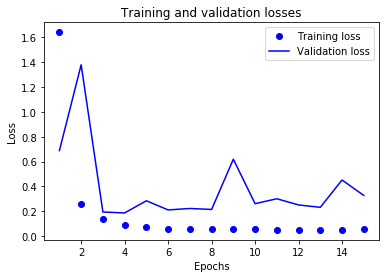

In [37]:
DoThiTiLeLoi(MoHinhTrain1)

- Dựa vào đồ thị ta thấy Training nhiều lần làm cho tỉ lỗi của tập test lớn.
- Chỉ cần Epochs 5 lần là đủ


### c. Dự đoán kết quả sau traing (Predict) 

####  - Chuyển đổi ảnh để Predict

In [38]:
def ImagePredict(path):
    dataPre=[]
    #imgPre = cv2.imread(path,cv2.IMREAD_ANYCOLOR)
    imgPre =get_im(path)
    imgPre = img_to_array(imgPre)
    dataPre.append(imgPre)
    dataPredict=np.array(dataPre, dtype=np.uint8)
    dataPredict = np.array(dataPredict, dtype="float") / 255.0
    return dataPredict

#### - Predict ảnh 

In [39]:
#Để tìm chỉ số mà tại đó mảng một chiều đạt giá trị nhỏ nhất hay lớn nhất

In [40]:
diachiImage='F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/Fruit-Images-Dataset-master/Training/Apple Golden 1/0_100.jpg'
#KetQuaDuDoan = model.predict(ImagePredict(diachiImage))
max_index = np.argmax(model.predict(ImagePredict(diachiImage)))
max_index

1

In [158]:
diachiImage='F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/Fruit-Images-Dataset-master/Training/Apple Golden 2/0_100.jpg'
ResultPred = model1.predict(ImagePredict(diachiImage))

In [160]:
ResultPred[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

In [161]:
lb = np.argmax(ResultPred[0])
lb

2

In [41]:
def TenTraiCayPredict(LablesName, ViTri):
    return LablesName[ViTri]

In [165]:
TenTraiCayPredict(TenTraiCay_Training,4)

'Apple Braeburn'

#### - Hiển thị kết quả dự đoán 

In [192]:
def HienThiKetQuaDuDoan(MoHinh,folder,Hang, Cot,NumImage, figsize=(20,10)):
    sequence_folder = glob.glob(os.path.join(folder, '*/*'))
    i=1
    demImage=0
    figs = plt.figure(figsize=figsize)
    NameImage=""
    #for sq in sequence_folder[start:end][:limit]:
    for sq in sequence_folder:
        sq = sq.replace('\\', '/')
        lables = sq.split('/')[-2]
        if NameImage != lables:
            NameImage = lables
            demImage=0
        if NameImage == lables:
            demImage+=1
        if demImage < NumImage:
            if i<(Hang*Cot):
                img = cv2.imread(sq,cv2.COLOR_BGR2RGB)
                
                ResultPr = MoHinh.predict(ImagePredict(sq))
                max_indexImage = np.argmax(ResultPr[0])
                LabelPred = TenTraiCayPredict(TenTraiCaySuDungPredict,max_indexImage)
                # Pick the first image for each label.
                plt.subplot(Hang, Cot, i)  # A grid of 8 rows x 8 columns
                #print(i)
                plt.axis('off')
                plt.title(lables+":"+LabelPred, fontsize=8)
                i += 1
                _ = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

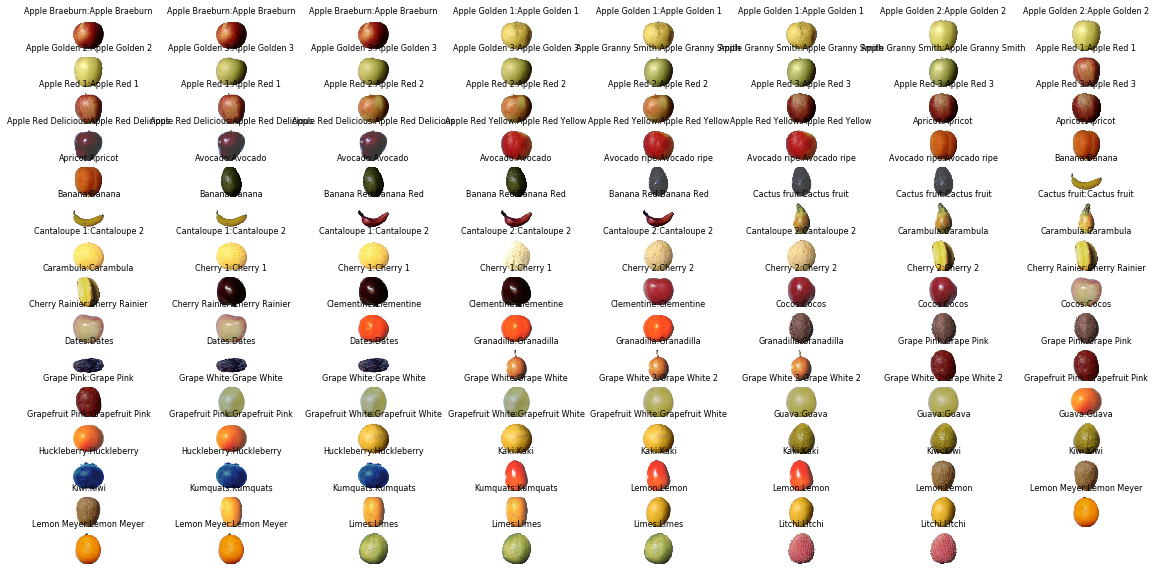

In [193]:
HienThiKetQuaDuDoan(model,folder_test,15,8,4)

In [225]:
def DuDoanFullData(MoHinh,folder):
    sequence_folder = glob.glob(os.path.join(folder, '*/*'))
    Dem=0
    for sq in sequence_folder:
        sq = sq.replace('\\', '/')
        lablesD = sq.split('/')[-2]
        img = cv2.imread(sq,cv2.COLOR_BGR2RGB)
        ResultPr = MoHinh.predict(ImagePredict(sq))
        max_indexImage = np.argmax(ResultPr[0])
        LabelPred = TenTraiCayPredict(TenTraiCaySuDungPredict,max_indexImage)
        if LabelPred==lablesD:
            Dem+=1
    return Dem,len(sequence_folder),Dem/len(sequence_folder)

In [241]:
def DuDoanFullDataRecall(MoHinh,folder):
    sequence_folder = glob.glob(os.path.join(folder, '*/*'))
    Dem=0
    lblData=[]
    lblPre=[]
    for sq in sequence_folder:
        sq = sq.replace('\\', '/')
        lablesData = sq.split('/')[-2]
        img = cv2.imread(sq,cv2.COLOR_BGR2RGB)
        ResultPr = MoHinh.predict(ImagePredict(sq))
        max_indexImage = np.argmax(ResultPr[0])
        LabelPred = TenTraiCayPredict(TenTraiCaySuDungPredict,max_indexImage)
        lblData.append(lablesData)
        lblPre.append(LabelPred)
    return lblData,lblPre

In [226]:
# Tỉ lệ dự đoán đúng trên tập Train
SoLuongDuDoanDungTrain,SoLuongTongTrain,TiLeTrain = DuDoanFullData(model1,folder_train)
print("Số lượng tổng: ",str(SoLuongTongTrain)," Số lượng dự đoán đúng: ",str(SoLuongDuDoanDungTrain)," Tỉ lệ: ",str(TiLeTrain*100))
# Tỉ lệ dự đoán đúng trên tập Test
SoLuongDuDoanDungTest,SoLuongTongTest,TiLeTest = DuDoanFullData(model1,folder_test)
print("Số lượng tổng: ",str(SoLuongTongTest)," Số lượng dự đoán đúng: ",str(SoLuongDuDoanDungTest)," Tỉ lệ: ",str(TiLeTest*100))

Số lượng tổng:  35133  Số lượng dự đoán đúng:  34838  Tỉ lệ:  99.16033358950274
Số lượng tổng:  11804  Số lượng dự đoán đúng:  11106  Tỉ lệ:  94.08675025415113


# IV. Tuning mạng CNN 

## 1. Thay đổi mô hình học 

In [46]:
model2 = model

In [47]:
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer=sgd, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])

In [48]:
MoHinhTrain2 = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 34s 982us/step - loss: 1.7586e-04 - categorical_accuracy: 0.9906 - val_loss: 0.0012 - val_categorical_accuracy: 0.9483
Epoch 2/15
35133/35133 [==============================] - 34s 958us/step - loss: 1.5317e-04 - categorical_accuracy: 0.9915 - val_loss: 0.0012 - val_categorical_accuracy: 0.9496
Epoch 3/15
35133/35133 [==============================] - 33s 937us/step - loss: 1.5423e-04 - categorical_accuracy: 0.9911 - val_loss: 0.0011 - val_categorical_accuracy: 0.9528
Epoch 4/15
35133/35133 [==============================] - 33s 941us/step - loss: 1.5721e-04 - categorical_accuracy: 0.9914 - val_loss: 0.0011 - val_categorical_accuracy: 0.9543
Epoch 5/15
35133/35133 [==============================] - 33s 935us/step - loss: 1.4417e-04 - categorical_accuracy: 0.9926 - val_loss: 0.0011 - val_categorical_accuracy: 0.9559
Epoch 6/15
35133/35133 [==============================] - 33s 945

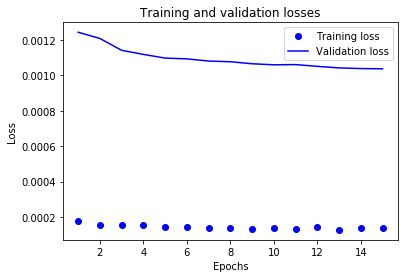

In [49]:
DoThiTiLeLoi(MoHinhTrain2)

In [50]:
#Đối với mô hình SGD ta thấy chỉ cần training 12 lần là cho kết quả tốt nhất
# Độ chính xác trên tập Train: 99.2% và Test: 96.87

In [123]:
model2.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/model2.h5')

In [51]:
model3 = model
Adag = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.9)
model3.compile(optimizer=Adag, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhTrain3 = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 34s 961us/step - loss: 1.8356e-04 - categorical_accuracy: 0.9904 - val_loss: 0.0011 - val_categorical_accuracy: 0.9559
Epoch 2/15
35133/35133 [==============================] - 33s 941us/step - loss: 1.5865e-04 - categorical_accuracy: 0.9915 - val_loss: 0.0011 - val_categorical_accuracy: 0.9563
Epoch 3/15
35133/35133 [==============================] - 33s 947us/step - loss: 1.5880e-04 - categorical_accuracy: 0.9916 - val_loss: 0.0011 - val_categorical_accuracy: 0.9565
Epoch 4/15
35133/35133 [==============================] - 33s 944us/step - loss: 1.6685e-04 - categorical_accuracy: 0.9911 - val_loss: 0.0011 - val_categorical_accuracy: 0.9566
Epoch 5/15
35133/35133 [==============================] - 33s 950us/step - loss: 1.7005e-04 - categorical_accuracy: 0.9911 - val_loss: 0.0011 - val_categorical_accuracy: 0.9566
Epoch 6/15
35133/35133 [==============================] - 33s 944

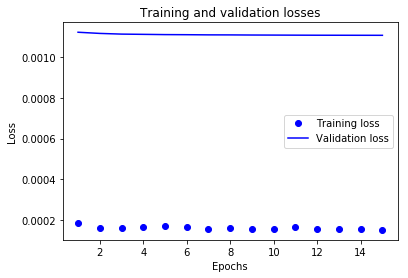

In [52]:
DoThiTiLeLoi(MoHinhTrain3)

In [124]:
model3.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/model3.h5')

In [53]:
model4 = model
Adad = optimizers.Adadelta(lr=0.01, rho=0.95, epsilon=None, decay=0.9)
model4.compile(optimizer=Adad, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhTrain4 = model4.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 35s 983us/step - loss: 1.5000e-04 - categorical_accuracy: 0.9920 - val_loss: 0.0011 - val_categorical_accuracy: 0.9568
Epoch 2/15
35133/35133 [==============================] - 34s 959us/step - loss: 1.5363e-04 - categorical_accuracy: 0.9917 - val_loss: 0.0011 - val_categorical_accuracy: 0.9568
Epoch 3/15
35133/35133 [==============================] - 34s 962us/step - loss: 1.6309e-04 - categorical_accuracy: 0.9912 - val_loss: 0.0011 - val_categorical_accuracy: 0.9568
Epoch 4/15
35133/35133 [==============================] - 34s 958us/step - loss: 1.6602e-04 - categorical_accuracy: 0.9914 - val_loss: 0.0011 - val_categorical_accuracy: 0.9568
Epoch 5/15
35133/35133 [==============================] - 34s 960us/step - loss: 1.6562e-04 - categorical_accuracy: 0.9912 - val_loss: 0.0011 - val_categorical_accuracy: 0.9568
Epoch 6/15
35133/35133 [==============================] - 34s 959

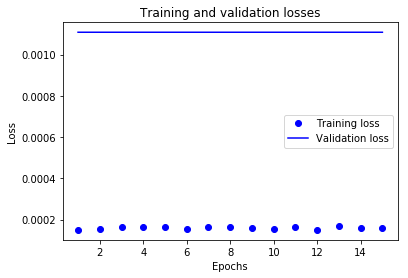

In [54]:
DoThiTiLeLoi(MoHinhTrain4)

In [125]:
model4.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/model4.h5')

In [55]:
model5 = model
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)
model5.compile(optimizer=adam, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhTrain5 = model5.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 34s 972us/step - loss: 2.1485e-04 - categorical_accuracy: 0.9893 - val_loss: 0.0011 - val_categorical_accuracy: 0.9583
Epoch 2/15
35133/35133 [==============================] - 34s 958us/step - loss: 1.3400e-04 - categorical_accuracy: 0.9927 - val_loss: 0.0011 - val_categorical_accuracy: 0.9556
Epoch 3/15
35133/35133 [==============================] - 33s 952us/step - loss: 1.2386e-04 - categorical_accuracy: 0.9929 - val_loss: 0.0011 - val_categorical_accuracy: 0.9576
Epoch 4/15
35133/35133 [==============================] - 34s 959us/step - loss: 1.3068e-04 - categorical_accuracy: 0.9927 - val_loss: 0.0010 - val_categorical_accuracy: 0.9579
Epoch 5/15
35133/35133 [==============================] - 33s 950us/step - loss: 1.2727e-04 - categorical_accuracy: 0.9927 - val_loss: 0.0011 - val_categorical_accuracy: 0.9576
Epoch 6/15
35133/35133 [==============================] - 34s 958

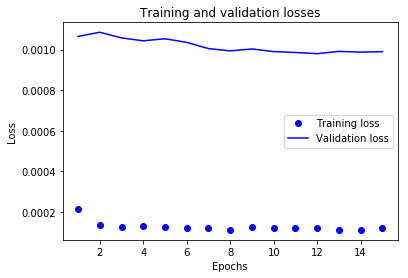

In [56]:
DoThiTiLeLoi(MoHinhTrain5)

In [126]:
model5.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/model5.h5')

In [75]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [194]:
NumFilter =[32,64,256]
Sizefilter = [(3,3),(5,5),(7,7)]
Padding =['same','valid']
PoolSize = [(2,2),(3,3)]
DropoutRatio = [0.2,0.25,0.5]
HamOptimi = ['SGD', 'RMSprop', 'Adam', 'Nadam']
Stride = [0,1,2]
NumDense = [128, 256, 512, 1024] 
NameActifuntion =['sigmoid','softmax']
NumConvolution =[0, 4, 10, 15]

(3, 3)

In [ ]:
for NumF in range(len(NumFilter)):
    for SizeF in range(len(Sizefilter)):
        for PaddingF in range(len(Padding)):
            for PoolSizeF in range(len(PoolSize)):
                for DroF in range(len(DropoutRatio)):
                    for OptiF in range(len(HamOptimi)):
                        for strideF in range(len(Stride)):
                            for NumDenseF in range(len(NumDense)):
                                for NameActifuntionF in range(len(NameActifuntion)):
                                    for NumConvolutionF in range(len(NumConvolution)):
                                        create_model(NumF,SizeF,PaddingF,PoolSizeF,DroF,OptiF,strideF,NumDenseF,NameActifuntionF,NumConvolutionF)

In [76]:
def create_model(NumFilterN,SizefilterN,PaddingN,PoolSizeN,DropN,HamOptimizerN,StrideN,NumDenseN,NameActifuntion,NumLayerN):
    modelN = Sequential()
    modelN.add(Conv2D(NumFilterN,filters=SizefilterN, strides=StrideN, padding=PaddingN, activation='relu', input_shape=input_shape))
    modelN.add(Conv2D(NumFilterN, filters=SizefilterN, activation='relu'))
    modelN.add(MaxPooling2D(pool_size=PoolSizeN))
    modelN.add(Dropout(DropN))
 
    modelN.add(Conv2D(NumFilterN*2, filters=SizefilterN, strides=StrideN, padding=PaddingN, activation='relu'))
    modelN.add(Conv2D(NumFilterN*2, filters=SizefilterN, strides=StrideN, padding=PaddingN, activation='relu'))
    modelN.add(MaxPooling2D(pool_size=PoolSizeN))
    modelN.add(Dropout(DropN))
 
    modelN.add(Conv2D(NumFilterN*2, filters=SizefilterN, strides=StrideN, padding=PaddingN, activation='relu'))
    modelN.add(Conv2D(NumFilterN*2, filters=SizefilterN, strides=StrideN, padding=PaddingN, activation='relu'))
    modelN.add(MaxPooling2D(pool_size=PoolSizeN))
    modelN.add(Dropout(DropN))
    for NumLay in range(NumLayerN):
        modelN.add(Conv2D(NumFilterN*2, filters=SizefilterN, strides=StrideN, padding=PaddingN, activation='relu'))
        modelN.add(Conv2D(NumFilterN*2, filters=SizefilterN, strides=StrideN, padding=PaddingN, activation='relu'))
        modelN.add(MaxPooling2D(pool_size=PoolSizeN))
        modelN.add(Dropout(DropN))
 
    modelN.add(Flatten())
    modelN.add(Dense(NumDenseN, activation='relu'))
    modelN.add(Dropout(DropN))
    modelN.add(Dense(NumDenseN, activation='relu'))
    modelN.add(Dropout(DropN))
    modelN.add(Dense(70, activation=NameActifuntion))
    #modelN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    modelN.compile(optimizer=HamOptimizerN, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
    return modelN

#### Tune the Training Optimization Algorithm

In [ ]:
#modelSelectOptimizer = model
modelSelectOptimizer = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=modelSelectOptimizer, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)


#classifier = KerasClassifier(build_fn=modelSelectOptimizer)

#parameters = {'batch_size': [25,32],
              #'epochs': [5,10],
              #'optimizer': ['adam', 'rmsprop'],
             #}
#grid_search = GridSearchCV(estimator=modelSelectOptimizer,param_grid = parameters,scoring = 'accuracy',cv = 10)
#grid_search = grid_search.fit(x_train, y_train)
#Adad = optimizers.Adadelta(lr=0.01, rho=0.95, epsilon=None, decay=0.9)
#model4.compile(optimizer=Adad, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
#MoHinhTrain4 = model4.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))




In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
means = grid_result.cv_results_[losses.mean_squared_error]
#                                ,metrics=[metrics.categorical_accuracy])
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## 2. Thay đổi mạng CNN

### a. Thay đổi hàm sofmax sang sigmoid 

In [57]:
modelSig = Sequential()
modelSig.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
modelSig.add(Conv2D(32, (3, 3), activation='relu'))
modelSig.add(MaxPooling2D(pool_size=(2, 2)))
modelSig.add(Dropout(droprate))
 
modelSig.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelSig.add(Conv2D(64, (3, 3), activation='relu'))
modelSig.add(MaxPooling2D(pool_size=(2, 2)))
modelSig.add(Dropout(droprate))
 
modelSig.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelSig.add(Conv2D(64, (3, 3), activation='relu'))
modelSig.add(MaxPooling2D(pool_size=(2, 2)))
modelSig.add(Dropout(droprate))
 
modelSig.add(Flatten())
modelSig.add(Dense(128, activation='relu'))
modelSig.add(Dropout(droprate))
modelSig.add(Dense(70, activation='sigmoid'))

In [58]:
modelSig1 = modelSig
modelSig1.compile(optimizer=optimizers.RMSprop(), loss=losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])

In [59]:
MoHinhTrainSig1 = modelSig1.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 34s 954us/step - loss: 1.8786 - categorical_accuracy: 0.4788 - val_loss: 0.4652 - val_categorical_accuracy: 0.8492
Epoch 2/15
35133/35133 [==============================] - 32s 923us/step - loss: 0.2842 - categorical_accuracy: 0.9097 - val_loss: 0.6466 - val_categorical_accuracy: 0.8128
Epoch 3/15
35133/35133 [==============================] - 33s 930us/step - loss: 0.1362 - categorical_accuracy: 0.9563 - val_loss: 0.2777 - val_categorical_accuracy: 0.9285
Epoch 4/15
35133/35133 [==============================] - 32s 921us/step - loss: 0.0886 - categorical_accuracy: 0.9710 - val_loss: 0.2365 - val_categorical_accuracy: 0.9463
Epoch 5/15
35133/35133 [==============================] - 33s 950us/step - loss: 0.0784 - categorical_accuracy: 0.9756 - val_loss: 0.9215 - val_categorical_accuracy: 0.8151
Epoch 6/15
35133/35133 [==============================] - 33s 931us/step - loss: 0.06

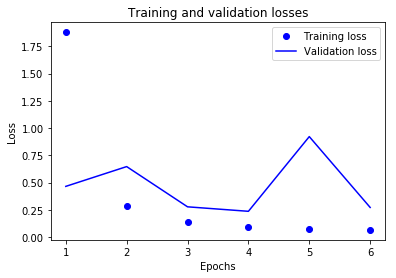

In [60]:
DoThiTiLeLoi(MoHinhTrainSig1)

In [127]:
modelSig1.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelSig1.h5')

In [61]:
modelSig2 = modelSig
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
modelSig2.compile(optimizer=sgd, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhTrainSig2 = modelSig2.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 34s 980us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 2/15
35133/35133 [==============================] - 32s 924us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 3/15
35133/35133 [==============================] - 32s 920us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 4/15
35133/35133 [==============================] - 32s 923us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 5/15
35133/35133 [==============================] - 32s 921us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 6/15
35133/35133 [==============================] - 33s 931us/step - loss: nan - categorical_accuracy: 0.0140

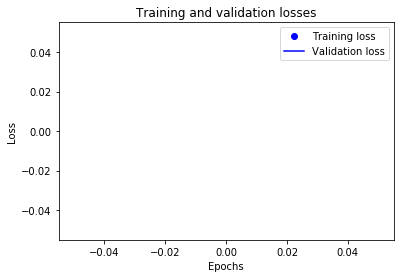

In [62]:
DoThiTiLeLoi(MoHinhTrainSig2)

In [128]:
modelSig2.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelSig2.h5')

In [63]:
modelSig3 = modelSig
Adag = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.9)
modelSig3.compile(optimizer=Adag, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhTrainSig3 = modelSig3.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 33s 951us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 2/15
35133/35133 [==============================] - 32s 924us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 3/15
35133/35133 [==============================] - 33s 930us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 4/15
35133/35133 [==============================] - 32s 925us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 5/15
35133/35133 [==============================] - 33s 930us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 6/15
35133/35133 [==============================] - 32s 923us/step - loss: nan - categorical_accuracy: 0.0140

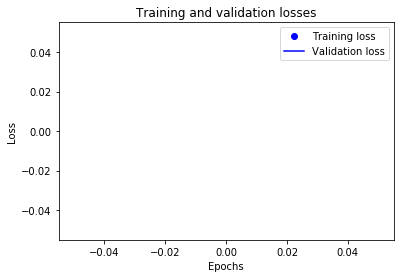

In [64]:
DoThiTiLeLoi(MoHinhTrainSig3)

In [129]:
modelSig3.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelSig3.h5')

In [65]:
modelSig4 = modelSig
Adad = optimizers.Adadelta(lr=0.01, rho=0.95, epsilon=None, decay=0.9)
modelSig4.compile(optimizer=Adad, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhTrainSig4 = modelSig4.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 34s 955us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 2/15
35133/35133 [==============================] - 33s 936us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 3/15
35133/35133 [==============================] - 33s 937us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 4/15
35133/35133 [==============================] - 33s 936us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 5/15
35133/35133 [==============================] - 33s 933us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 6/15
35133/35133 [==============================] - 33s 936us/step - loss: nan - categorical_accuracy: 0.0140

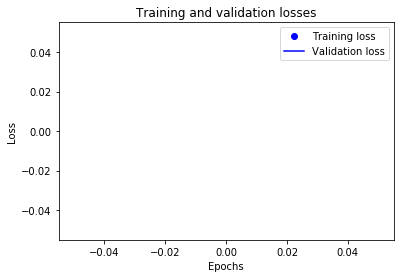

In [66]:
DoThiTiLeLoi(MoHinhTrainSig4)

In [130]:
modelSig4.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelSig4.h5')

In [67]:
modelSig5 = modelSig
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)
modelSig5.compile(optimizer=adam, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhTrainSig5 = modelSig5.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 36s 1ms/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 2/15
35133/35133 [==============================] - 34s 968us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 3/15
35133/35133 [==============================] - 33s 952us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 4/15
35133/35133 [==============================] - 34s 957us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 5/15
35133/35133 [==============================] - 33s 944us/step - loss: nan - categorical_accuracy: 0.0140 - val_loss: nan - val_categorical_accuracy: 0.0139
Epoch 6/15
35133/35133 [==============================] - 33s 951us/step - loss: nan - categorical_accuracy: 0.0140 -

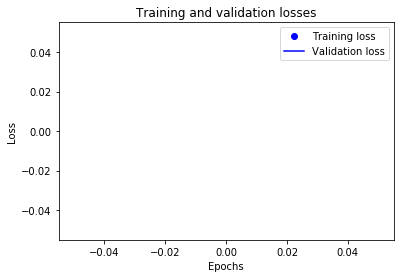

In [68]:
DoThiTiLeLoi(MoHinhTrainSig5)

In [131]:
modelSig5.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelSig5.h5')

# b. Thay đổi kích thước Filter mạng CNN

In [69]:
ChangeFiltermodel = Sequential()
ChangeFiltermodel.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=input_shape))
ChangeFiltermodel.add(Conv2D(32, (5, 5), activation='relu'))
ChangeFiltermodel.add(MaxPooling2D(pool_size=(2, 2)))
ChangeFiltermodel.add(Dropout(droprate))
 
ChangeFiltermodel.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
ChangeFiltermodel.add(Conv2D(64, (5, 5), activation='relu'))
ChangeFiltermodel.add(MaxPooling2D(pool_size=(2, 2)))
ChangeFiltermodel.add(Dropout(droprate))
 
ChangeFiltermodel.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
ChangeFiltermodel.add(Conv2D(64, (3, 3), activation='relu'))
ChangeFiltermodel.add(MaxPooling2D(pool_size=(2, 2)))
ChangeFiltermodel.add(Dropout(droprate))
 
ChangeFiltermodel.add(Flatten())
ChangeFiltermodel.add(Dense(128, activation='relu'))
ChangeFiltermodel.add(Dropout(droprate))
ChangeFiltermodel.add(Dense(70, activation='softmax'))

In [70]:
ChangeFiltermodel1 = ChangeFiltermodel

In [71]:
ChangeFiltermodel1.compile(optimizer=optimizers.RMSprop(), loss=losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])

In [72]:
MoHinhChangeFiltermodel1 = ChangeFiltermodel1.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 47s 1ms/step - loss: 1.9849 - categorical_accuracy: 0.4780 - val_loss: 0.5039 - val_categorical_accuracy: 0.8686
Epoch 2/15
35133/35133 [==============================] - 45s 1ms/step - loss: 0.3523 - categorical_accuracy: 0.8948 - val_loss: 0.2266 - val_categorical_accuracy: 0.9348
Epoch 3/15
35133/35133 [==============================] - 44s 1ms/step - loss: 0.1574 - categorical_accuracy: 0.9504 - val_loss: 0.3147 - val_categorical_accuracy: 0.9147
Epoch 4/15
35133/35133 [==============================] - 44s 1ms/step - loss: 0.1262 - categorical_accuracy: 0.9624 - val_loss: 0.2738 - val_categorical_accuracy: 0.9460
Epoch 5/15
35133/35133 [==============================] - 45s 1ms/step - loss: 0.1007 - categorical_accuracy: 0.9702 - val_loss: 0.5596 - val_categorical_accuracy: 0.8944
Epoch 6/15
35133/35133 [==============================] - 45s 1ms/step - loss: 0.1037 - categor

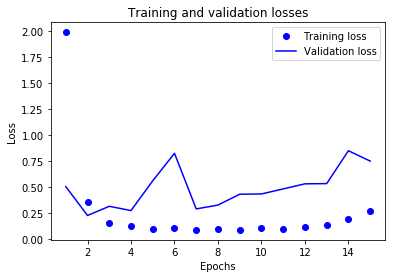

In [73]:
DoThiTiLeLoi(MoHinhChangeFiltermodel1)

In [132]:
ChangeFiltermodel1.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/ChangeFiltermodel1.h5')

In [74]:
ChangeFiltermodel2 = ChangeFiltermodel

In [75]:
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
ChangeFiltermodel2.compile(optimizer=sgd, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhChangeFiltermodel2 = ChangeFiltermodel2.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 46s 1ms/step - loss: 3.9517e-04 - categorical_accuracy: 0.9837 - val_loss: 0.0015 - val_categorical_accuracy: 0.9437
Epoch 2/15
35133/35133 [==============================] - 44s 1ms/step - loss: 3.3223e-04 - categorical_accuracy: 0.9855 - val_loss: 0.0015 - val_categorical_accuracy: 0.9459
Epoch 3/15
35133/35133 [==============================] - 44s 1ms/step - loss: 3.0397e-04 - categorical_accuracy: 0.9865 - val_loss: 0.0014 - val_categorical_accuracy: 0.9493
Epoch 4/15
35133/35133 [==============================] - 44s 1ms/step - loss: 2.9007e-04 - categorical_accuracy: 0.9869 - val_loss: 0.0015 - val_categorical_accuracy: 0.9456
Epoch 5/15
35133/35133 [==============================] - 44s 1ms/step - loss: 2.5696e-04 - categorical_accuracy: 0.9882 - val_loss: 0.0014 - val_categorical_accuracy: 0.9498
Epoch 6/15
35133/35133 [==============================] - 44s 1ms/step - lo

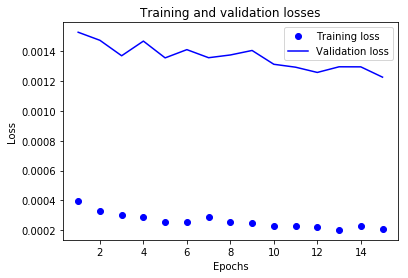

In [76]:
DoThiTiLeLoi(MoHinhChangeFiltermodel2)

In [133]:
ChangeFiltermodel2.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/ChangeFiltermodel2.h5')

In [77]:
ChangeFiltermodel5 = ChangeFiltermodel
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)
ChangeFiltermodel5.compile(optimizer=adam, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhChangeFiltermodel5 = ChangeFiltermodel5.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 45s 1ms/step - loss: 4.3670e-04 - categorical_accuracy: 0.9820 - val_loss: 0.0013 - val_categorical_accuracy: 0.9526
Epoch 2/15
35133/35133 [==============================] - 44s 1ms/step - loss: 2.2297e-04 - categorical_accuracy: 0.9892 - val_loss: 0.0013 - val_categorical_accuracy: 0.9549
Epoch 3/15
35133/35133 [==============================] - 44s 1ms/step - loss: 1.9910e-04 - categorical_accuracy: 0.9901 - val_loss: 0.0012 - val_categorical_accuracy: 0.9549
Epoch 4/15
35133/35133 [==============================] - 44s 1ms/step - loss: 1.9653e-04 - categorical_accuracy: 0.9902 - val_loss: 0.0012 - val_categorical_accuracy: 0.9553
Epoch 5/15
35133/35133 [==============================] - 44s 1ms/step - loss: 2.0033e-04 - categorical_accuracy: 0.9904 - val_loss: 0.0012 - val_categorical_accuracy: 0.9561
Epoch 6/15
35133/35133 [==============================] - 44s 1ms/step - lo

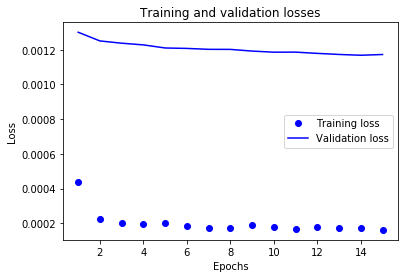

In [78]:
DoThiTiLeLoi(MoHinhChangeFiltermodel5)

In [134]:
ChangeFiltermodel5.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/ChangeFiltermodel5.h5')

# Thay doi so luong filter

In [79]:
modelNumFilter = Sequential()
modelNumFilter.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
modelNumFilter.add(Conv2D(64, (3, 3), activation='relu'))
modelNumFilter.add(MaxPooling2D(pool_size=(2, 2)))
modelNumFilter.add(Dropout(droprate))
 
modelNumFilter.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelNumFilter.add(Conv2D(64, (3, 3), activation='relu'))
modelNumFilter.add(MaxPooling2D(pool_size=(2, 2)))
modelNumFilter.add(Dropout(droprate))
 
modelNumFilter.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
modelNumFilter.add(Conv2D(256, (3, 3), activation='relu'))
modelNumFilter.add(MaxPooling2D(pool_size=(2, 2)))
modelNumFilter.add(Dropout(droprate))
 
modelNumFilter.add(Flatten())
modelNumFilter.add(Dense(256, activation='relu'))
modelNumFilter.add(Dropout(droprate))
modelNumFilter.add(Dense(70, activation='softmax'))

In [80]:
modelNumFilter1 = modelNumFilter

In [81]:
modelNumFilter1.compile(optimizer=optimizers.RMSprop(), loss=losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])

In [83]:
MoHinhmodelNumFilter1 = modelNumFilter1.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 67s 2ms/step - loss: 1.5767 - categorical_accuracy: 0.5873 - val_loss: 0.7454 - val_categorical_accuracy: 0.7760
Epoch 2/15
35133/35133 [==============================] - 63s 2ms/step - loss: 0.1897 - categorical_accuracy: 0.9496 - val_loss: 0.3485 - val_categorical_accuracy: 0.9251
Epoch 3/15
35133/35133 [==============================] - 63s 2ms/step - loss: 0.1037 - categorical_accuracy: 0.9712 - val_loss: 0.3368 - val_categorical_accuracy: 0.9343
Epoch 4/15
35133/35133 [==============================] - 63s 2ms/step - loss: 0.0842 - categorical_accuracy: 0.9779 - val_loss: 0.4292 - val_categorical_accuracy: 0.9267
Epoch 5/15
35133/35133 [==============================] - 63s 2ms/step - loss: 0.0765 - categorical_accuracy: 0.9804 - val_loss: 0.7405 - val_categorical_accuracy: 0.9092
Epoch 6/15
35133/35133 [==============================] - 63s 2ms/step - loss: 0.0708 - categor

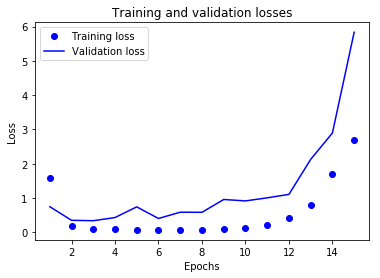

In [84]:
DoThiTiLeLoi(MoHinhmodelNumFilter1)

In [135]:
modelNumFilter1.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNumFilter1.h5')

In [85]:
modelNumFilter2 = modelNumFilter
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
modelNumFilter2.compile(optimizer=sgd, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhmodelNumFilter2 = modelNumFilter2.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 63s 2ms/step - loss: 0.0036 - categorical_accuracy: 0.8747 - val_loss: 0.0041 - val_categorical_accuracy: 0.8547
Epoch 2/15
35133/35133 [==============================] - 62s 2ms/step - loss: 0.0024 - categorical_accuracy: 0.9174 - val_loss: 0.0038 - val_categorical_accuracy: 0.8661
Epoch 3/15
35133/35133 [==============================] - 62s 2ms/step - loss: 0.0021 - categorical_accuracy: 0.9259 - val_loss: 0.0036 - val_categorical_accuracy: 0.8752
Epoch 4/15
35133/35133 [==============================] - 62s 2ms/step - loss: 0.0020 - categorical_accuracy: 0.9311 - val_loss: 0.0035 - val_categorical_accuracy: 0.8763
Epoch 5/15
35133/35133 [==============================] - 62s 2ms/step - loss: 0.0018 - categorical_accuracy: 0.9376 - val_loss: 0.0037 - val_categorical_accuracy: 0.8688
Epoch 6/15
35133/35133 [==============================] - 62s 2ms/step - loss: 0.0020 - categor

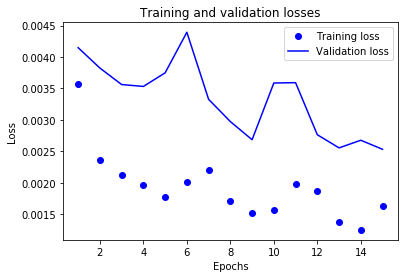

In [86]:
DoThiTiLeLoi(MoHinhmodelNumFilter2)

In [136]:
modelNumFilter2.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNumFilter2.h5')

In [87]:
modelNumFilter5 = modelNumFilter
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)
modelNumFilter5.compile(optimizer=adam, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhmodelNumFilter5 = modelNumFilter5.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 145s 4ms/step - loss: 0.0015 - categorical_accuracy: 0.9467 - val_loss: 0.0027 - val_categorical_accuracy: 0.9054
Epoch 2/15
35133/35133 [==============================] - 69s 2ms/step - loss: 0.0012 - categorical_accuracy: 0.9576 - val_loss: 0.0026 - val_categorical_accuracy: 0.9078
Epoch 3/15
35133/35133 [==============================] - 65s 2ms/step - loss: 0.0011 - categorical_accuracy: 0.9624 - val_loss: 0.0025 - val_categorical_accuracy: 0.9113
Epoch 4/15
35133/35133 [==============================] - 66s 2ms/step - loss: 9.7470e-04 - categorical_accuracy: 0.9659 - val_loss: 0.0024 - val_categorical_accuracy: 0.9157
Epoch 5/15
35133/35133 [==============================] - 65s 2ms/step - loss: 0.0010 - categorical_accuracy: 0.9642 - val_loss: 0.0023 - val_categorical_accuracy: 0.9191
Epoch 6/15
35133/35133 [==============================] - 65s 2ms/step - loss: 9.9060e-04 

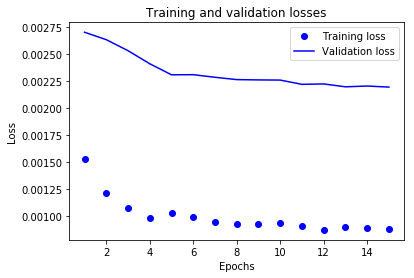

In [88]:
DoThiTiLeLoi(MoHinhmodelNumFilter5)

In [137]:
modelNumFilter5.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNumFilter5.h5')

#### Giảm số Layer (Convolution) 

In [89]:
modelNewLayer = Sequential()
modelNewLayer.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
modelNewLayer.add(Conv2D(32, (3, 3), activation='relu'))
modelNewLayer.add(MaxPooling2D(pool_size=(2, 2)))
modelNewLayer.add(Dropout(droprate))
 
modelNewLayer.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelNewLayer.add(Conv2D(64, (3, 3), activation='relu'))
modelNewLayer.add(MaxPooling2D(pool_size=(2, 2)))
modelNewLayer.add(Dropout(droprate))
 
modelNewLayer.add(Flatten())
modelNewLayer.add(Dense(128, activation='relu'))
modelNewLayer.add(Dropout(droprate))
modelNewLayer.add(Dense(70, activation='softmax'))

In [90]:
modelNewLayer1 = modelNewLayer
modelNewLayer1.compile(optimizer=optimizers.RMSprop(), loss=losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])
MoHinhmodelNewLayer1 = modelNewLayer1.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 36s 1ms/step - loss: 1.2182 - categorical_accuracy: 0.6647 - val_loss: 0.4545 - val_categorical_accuracy: 0.8573
Epoch 2/15
35133/35133 [==============================] - 33s 936us/step - loss: 0.1684 - categorical_accuracy: 0.9454 - val_loss: 0.2124 - val_categorical_accuracy: 0.9388
Epoch 3/15
35133/35133 [==============================] - 33s 944us/step - loss: 0.0965 - categorical_accuracy: 0.9699 - val_loss: 0.2037 - val_categorical_accuracy: 0.9438
Epoch 4/15
35133/35133 [==============================] - 33s 939us/step - loss: 0.0735 - categorical_accuracy: 0.9757 - val_loss: 0.5419 - val_categorical_accuracy: 0.8745
Epoch 5/15
35133/35133 [==============================] - 33s 943us/step - loss: 0.0569 - categorical_accuracy: 0.9808 - val_loss: 0.1402 - val_categorical_accuracy: 0.9647
Epoch 6/15
35133/35133 [==============================] - 33s 948us/step - loss: 0.0527

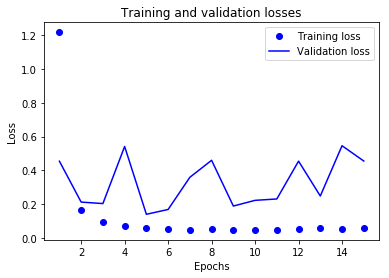

In [91]:
DoThiTiLeLoi(MoHinhmodelNewLayer1)

In [138]:
modelNewLayer1.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewLayer1.h5')

In [92]:
modelNewLayer2 = modelNewLayer
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
modelNewLayer2.compile(optimizer=sgd, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhmodelNewLayer2 = modelNewLayer2.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 40s 1ms/step - loss: 2.3497e-04 - categorical_accuracy: 0.9896 - val_loss: 0.0011 - val_categorical_accuracy: 0.9588
Epoch 2/15
35133/35133 [==============================] - 33s 938us/step - loss: 1.9936e-04 - categorical_accuracy: 0.9904 - val_loss: 0.0010 - val_categorical_accuracy: 0.9614
Epoch 3/15
35133/35133 [==============================] - 32s 902us/step - loss: 1.8291e-04 - categorical_accuracy: 0.9913 - val_loss: 9.9814e-04 - val_categorical_accuracy: 0.9620
Epoch 4/15
35133/35133 [==============================] - 32s 916us/step - loss: 1.7525e-04 - categorical_accuracy: 0.9908 - val_loss: 9.6047e-04 - val_categorical_accuracy: 0.9629
Epoch 5/15
35133/35133 [==============================] - 32s 903us/step - loss: 1.6893e-04 - categorical_accuracy: 0.9914 - val_loss: 9.5195e-04 - val_categorical_accuracy: 0.9628
Epoch 6/15
35133/35133 [==============================]

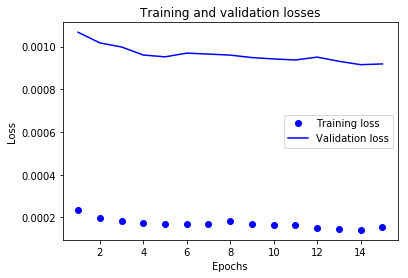

In [93]:
DoThiTiLeLoi(MoHinhmodelNewLayer2)

In [139]:
modelNewLayer2.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewLayer2.h5')

In [94]:
modelNewLayer5 = modelNewLayer
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)
modelNewLayer5.compile(optimizer=adam, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhmodelNewLayer5 = modelNewLayer5.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 44s 1ms/step - loss: 2.7143e-04 - categorical_accuracy: 0.9892 - val_loss: 9.5375e-04 - val_categorical_accuracy: 0.9656
Epoch 2/15
35133/35133 [==============================] - 34s 970us/step - loss: 1.6183e-04 - categorical_accuracy: 0.9925 - val_loss: 9.2380e-04 - val_categorical_accuracy: 0.9661
Epoch 3/15
35133/35133 [==============================] - 35s 991us/step - loss: 1.7282e-04 - categorical_accuracy: 0.9920 - val_loss: 8.8456e-04 - val_categorical_accuracy: 0.9673
Epoch 4/15
35133/35133 [==============================] - 35s 987us/step - loss: 1.4226e-04 - categorical_accuracy: 0.9930 - val_loss: 8.9190e-04 - val_categorical_accuracy: 0.9670
Epoch 5/15
35133/35133 [==============================] - 34s 967us/step - loss: 1.4758e-04 - categorical_accuracy: 0.9924 - val_loss: 8.8666e-04 - val_categorical_accuracy: 0.9676
Epoch 6/15
35133/35133 [=======================

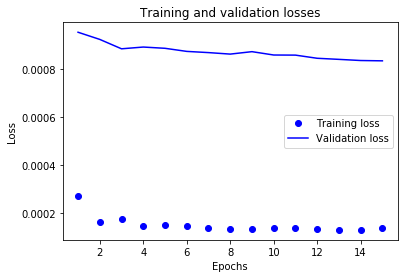

In [95]:
DoThiTiLeLoi(MoHinhmodelNewLayer5)

In [140]:
modelNewLayer5.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewLayer5.h5')

Mô hình sau khi train: Tập train: 99.26% Tập test: 96.8%

# Thay doi Batch size

In [96]:
batch_sizeNew = 32

In [97]:
modelNewBatchSize1 = model

In [98]:
modelNewBatchSize1 = modelNewLayer
modelNewBatchSize1.compile(optimizer=optimizers.RMSprop(), loss=losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])
MoHinhmodelNewBatchSize1 = modelNewBatchSize1.fit(x_train, y_train, batch_size=batch_sizeNew, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 55s 2ms/step - loss: 0.1320 - categorical_accuracy: 0.9796 - val_loss: 0.4954 - val_categorical_accuracy: 0.9581
Epoch 2/15
35133/35133 [==============================] - 44s 1ms/step - loss: 0.1412 - categorical_accuracy: 0.9804 - val_loss: 0.5210 - val_categorical_accuracy: 0.9507
Epoch 3/15
35133/35133 [==============================] - 41s 1ms/step - loss: 0.2028 - categorical_accuracy: 0.9771 - val_loss: 0.6395 - val_categorical_accuracy: 0.9439
Epoch 4/15
35133/35133 [==============================] - 41s 1ms/step - loss: 0.2342 - categorical_accuracy: 0.9761 - val_loss: 0.6991 - val_categorical_accuracy: 0.9489
Epoch 5/15
35133/35133 [==============================] - 41s 1ms/step - loss: 0.2916 - categorical_accuracy: 0.9734 - val_loss: 0.6227 - val_categorical_accuracy: 0.9482
Epoch 6/15
35133/35133 [==============================] - 39s 1ms/step - loss: 0.2804 - categor

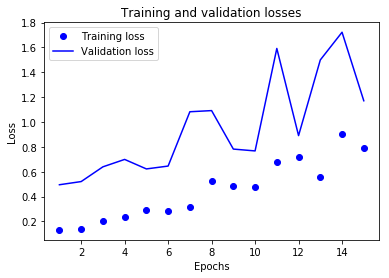

In [100]:
DoThiTiLeLoi(MoHinhmodelNewBatchSize1)

In [141]:
modelNewBatchSize1.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewBatchSize1.h5')

In [101]:
modelNewBatchSize2 = model
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
modelNewBatchSize2.compile(optimizer=sgd, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhmodelNewBatchSize2 = modelNewBatchSize2.fit(x_train, y_train, batch_size=batch_sizeNew, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 49s 1ms/step - loss: 1.1599e-04 - categorical_accuracy: 0.9925 - val_loss: 9.9379e-04 - val_categorical_accuracy: 0.9597
Epoch 2/15
35133/35133 [==============================] - 48s 1ms/step - loss: 1.1688e-04 - categorical_accuracy: 0.9930 - val_loss: 0.0010 - val_categorical_accuracy: 0.9595
Epoch 3/15
35133/35133 [==============================] - 50s 1ms/step - loss: 1.1073e-04 - categorical_accuracy: 0.9935 - val_loss: 9.8902e-04 - val_categorical_accuracy: 0.9596
Epoch 4/15
35133/35133 [==============================] - 49s 1ms/step - loss: 1.1098e-04 - categorical_accuracy: 0.9933 - val_loss: 9.9222e-04 - val_categorical_accuracy: 0.9598
Epoch 5/15
35133/35133 [==============================] - 49s 1ms/step - loss: 1.1043e-04 - categorical_accuracy: 0.9930 - val_loss: 9.8920e-04 - val_categorical_accuracy: 0.9602
Epoch 6/15
35133/35133 [==============================] - 4

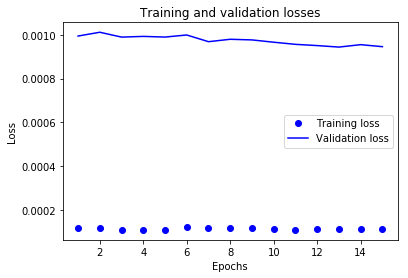

In [103]:
DoThiTiLeLoi(MoHinhmodelNewBatchSize2)

In [142]:
modelNewBatchSize2.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewBatchSize2.h5')

In [104]:
batch_sizeNew1 = 128

In [105]:
modelNewBatchSize128_1 = model

In [106]:
modelNewBatchSize128_1 = modelNewLayer
modelNewBatchSize128_1.compile(optimizer=optimizers.RMSprop(), loss=losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])
MoHinhmodelNewBatchSize128_1 = modelNewBatchSize128_1.fit(x_train, y_train, batch_size=batch_sizeNew1, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 33s 942us/step - loss: 0.3214 - categorical_accuracy: 0.9751 - val_loss: 0.9376 - val_categorical_accuracy: 0.9382
Epoch 2/15
35133/35133 [==============================] - 30s 857us/step - loss: 0.3976 - categorical_accuracy: 0.9693 - val_loss: 0.9211 - val_categorical_accuracy: 0.9350
Epoch 3/15
35133/35133 [==============================] - 31s 891us/step - loss: 0.3271 - categorical_accuracy: 0.9739 - val_loss: 1.1143 - val_categorical_accuracy: 0.9259
Epoch 4/15
35133/35133 [==============================] - 32s 911us/step - loss: 0.3834 - categorical_accuracy: 0.9703 - val_loss: 1.1072 - val_categorical_accuracy: 0.9239
Epoch 5/15
35133/35133 [==============================] - 30s 860us/step - loss: 0.4797 - categorical_accuracy: 0.9648 - val_loss: 0.9880 - val_categorical_accuracy: 0.9358
Epoch 6/15
35133/35133 [==============================] - 30s 854us/step - loss: 0.58

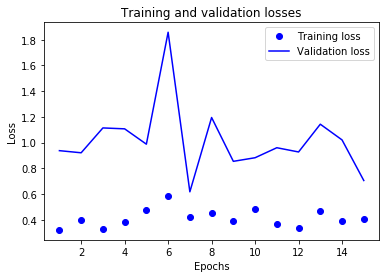

In [107]:
DoThiTiLeLoi(MoHinhmodelNewBatchSize128_1)

In [143]:
modelNewBatchSize128_1.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewBatchSize128_1.h5')

In [108]:
modelNewBatchSize128_2 = model
modelNewBatchSize128_2.compile(optimizer=optimizers.RMSprop(), loss=losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])
MoHinhmodelNewBatchSize128_2 = modelNewBatchSize128_2.fit(x_train, y_train, batch_size=batch_sizeNew1, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 40s 1ms/step - loss: 0.0495 - categorical_accuracy: 0.9874 - val_loss: 0.3491 - val_categorical_accuracy: 0.9524
Epoch 2/15
35133/35133 [==============================] - 31s 893us/step - loss: 0.0502 - categorical_accuracy: 0.9868 - val_loss: 0.3075 - val_categorical_accuracy: 0.9597
Epoch 3/15
35133/35133 [==============================] - 33s 926us/step - loss: 0.0436 - categorical_accuracy: 0.9885 - val_loss: 0.3556 - val_categorical_accuracy: 0.9595
Epoch 4/15
35133/35133 [==============================] - 32s 909us/step - loss: 0.0489 - categorical_accuracy: 0.9880 - val_loss: 0.4882 - val_categorical_accuracy: 0.9519
Epoch 5/15
35133/35133 [==============================] - 32s 910us/step - loss: 0.0429 - categorical_accuracy: 0.9890 - val_loss: 0.4374 - val_categorical_accuracy: 0.9497
Epoch 6/15
35133/35133 [==============================] - 32s 906us/step - loss: 0.0520

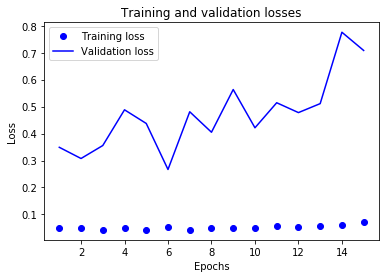

In [109]:
DoThiTiLeLoi(MoHinhmodelNewBatchSize128_2)

In [144]:
modelNewBatchSize128_2.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewBatchSize128_2.h5')

####  

In [110]:
modelNewLayer6 = modelNewLayer
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)
modelNewLayer6.compile(optimizer=adam, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhmodelNewLayer6 = modelNewLayer6.fit(x_train, y_train, batch_size=batch_sizeNew, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 43s 1ms/step - loss: 0.0022 - categorical_accuracy: 0.9232 - val_loss: 0.0017 - val_categorical_accuracy: 0.9419
Epoch 2/15
35133/35133 [==============================] - 39s 1ms/step - loss: 8.2172e-04 - categorical_accuracy: 0.9703 - val_loss: 0.0015 - val_categorical_accuracy: 0.9464
Epoch 3/15
35133/35133 [==============================] - 39s 1ms/step - loss: 6.4072e-04 - categorical_accuracy: 0.9768 - val_loss: 0.0015 - val_categorical_accuracy: 0.9476
Epoch 4/15
35133/35133 [==============================] - 39s 1ms/step - loss: 6.3932e-04 - categorical_accuracy: 0.9769 - val_loss: 0.0015 - val_categorical_accuracy: 0.9478
Epoch 5/15
35133/35133 [==============================] - 40s 1ms/step - loss: 5.3412e-04 - categorical_accuracy: 0.9806 - val_loss: 0.0015 - val_categorical_accuracy: 0.9484
Epoch 6/15
35133/35133 [==============================] - 39s 1ms/step - loss: 

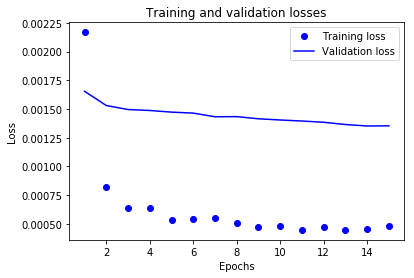

In [111]:
DoThiTiLeLoi(MoHinhmodelNewLayer6)

In [145]:
modelNewLayer6.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewLayer6.h5')

In [112]:
modelNewLayer7 = modelNewLayer
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)
modelNewLayer7.compile(optimizer=adam, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhmodelNewLayer7 = modelNewLayer7.fit(x_train, y_train, batch_size=batch_sizeNew1, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 42s 1ms/step - loss: 6.6087e-04 - categorical_accuracy: 0.9759 - val_loss: 0.0015 - val_categorical_accuracy: 0.9459
Epoch 2/15
35133/35133 [==============================] - 31s 874us/step - loss: 3.5437e-04 - categorical_accuracy: 0.9859 - val_loss: 0.0015 - val_categorical_accuracy: 0.9463
Epoch 3/15
35133/35133 [==============================] - 32s 903us/step - loss: 3.2700e-04 - categorical_accuracy: 0.9866 - val_loss: 0.0015 - val_categorical_accuracy: 0.9472
Epoch 4/15
35133/35133 [==============================] - 31s 888us/step - loss: 3.0445e-04 - categorical_accuracy: 0.9874 - val_loss: 0.0015 - val_categorical_accuracy: 0.9476
Epoch 5/15
35133/35133 [==============================] - 31s 883us/step - loss: 2.8367e-04 - categorical_accuracy: 0.9882 - val_loss: 0.0015 - val_categorical_accuracy: 0.9483
Epoch 6/15
35133/35133 [==============================] - 31s 879us

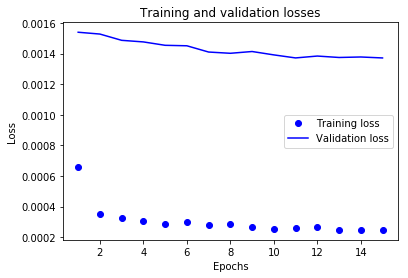

In [113]:
DoThiTiLeLoi(MoHinhmodelNewLayer7)

In [146]:
modelNewLayer7.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewLayer7.h5')

In [114]:
modelNewLayer8 = modelNewLayer
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)
modelNewLayer8.compile(optimizer=adam, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhmodelNewLayer8 = modelNewLayer8.fit(x_train, y_train, batch_size=512, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 36s 1ms/step - loss: 7.5457e-04 - categorical_accuracy: 0.9709 - val_loss: 0.0015 - val_categorical_accuracy: 0.9463
Epoch 2/15
35133/35133 [==============================] - 28s 802us/step - loss: 4.4784e-04 - categorical_accuracy: 0.9813 - val_loss: 0.0014 - val_categorical_accuracy: 0.9494
Epoch 3/15
35133/35133 [==============================] - 28s 800us/step - loss: 3.4351e-04 - categorical_accuracy: 0.9849 - val_loss: 0.0014 - val_categorical_accuracy: 0.9508
Epoch 4/15
35133/35133 [==============================] - 28s 796us/step - loss: 3.2153e-04 - categorical_accuracy: 0.9855 - val_loss: 0.0013 - val_categorical_accuracy: 0.9517
Epoch 5/15
35133/35133 [==============================] - 29s 839us/step - loss: 2.9762e-04 - categorical_accuracy: 0.9864 - val_loss: 0.0014 - val_categorical_accuracy: 0.9508
Epoch 6/15
35133/35133 [==============================] - 29s 829us

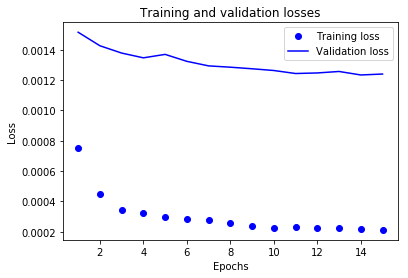

In [115]:
DoThiTiLeLoi(MoHinhmodelNewLayer8)

In [147]:
modelNewLayer8.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelNewLayer8.h5')

#### Thay đổi Dropout 

In [116]:
modelDropout  = Sequential()
modelDropout.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
modelDropout.add(Conv2D(32, (3, 3), activation='relu'))
modelDropout.add(MaxPooling2D(pool_size=(2, 2)))
 
modelDropout.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelDropout.add(Conv2D(64, (3, 3), activation='relu'))
modelDropout.add(MaxPooling2D(pool_size=(2, 2)))
 
modelDropout.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelDropout.add(Conv2D(64, (3, 3), activation='relu'))
modelDropout.add(MaxPooling2D(pool_size=(2, 2)))
 
modelDropout.add(Flatten())
modelDropout.add(Dense(128, activation='relu'))
modelDropout.add(Dropout(0.25))
modelDropout.add(Dense(70, activation='softmax'))

In [117]:
modelDropout1 = modelDropout
modelDropout1.compile(optimizer=optimizers.RMSprop(), loss=losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])
MoHinhmodelDropout1 = modelDropout1.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 38s 1ms/step - loss: 1.2735 - categorical_accuracy: 0.6572 - val_loss: 0.4601 - val_categorical_accuracy: 0.8699
Epoch 2/15
35133/35133 [==============================] - 34s 959us/step - loss: 0.1659 - categorical_accuracy: 0.9503 - val_loss: 0.3209 - val_categorical_accuracy: 0.9127
Epoch 3/15
35133/35133 [==============================] - 35s 987us/step - loss: 0.0941 - categorical_accuracy: 0.9712 - val_loss: 0.2288 - val_categorical_accuracy: 0.9411
Epoch 4/15
35133/35133 [==============================] - 34s 960us/step - loss: 0.0654 - categorical_accuracy: 0.9798 - val_loss: 0.2861 - val_categorical_accuracy: 0.9393
Epoch 5/15
35133/35133 [==============================] - 34s 971us/step - loss: 0.0559 - categorical_accuracy: 0.9823 - val_loss: 0.2587 - val_categorical_accuracy: 0.9324
Epoch 6/15
35133/35133 [==============================] - 34s 960us/step - loss: 0.0453

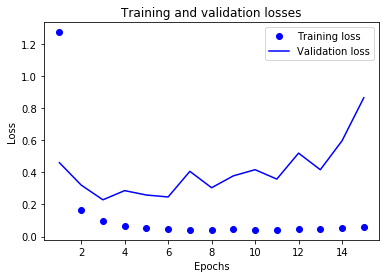

In [118]:
DoThiTiLeLoi(MoHinhmodelDropout1)

In [148]:
modelDropout1.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelDropout1.h5')

In [119]:
modelDropout5 = modelDropout
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)
modelDropout5.compile(optimizer=adam, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhmodelDropout5 = modelDropout5.fit(x_train, y_train, batch_size=512, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 32s 903us/step - loss: 3.4688e-04 - categorical_accuracy: 0.9841 - val_loss: 0.0013 - val_categorical_accuracy: 0.9510
Epoch 2/15
35133/35133 [==============================] - 28s 798us/step - loss: 1.1344e-04 - categorical_accuracy: 0.9931 - val_loss: 0.0012 - val_categorical_accuracy: 0.9534
Epoch 3/15
35133/35133 [==============================] - 28s 799us/step - loss: 1.0849e-04 - categorical_accuracy: 0.9930 - val_loss: 0.0012 - val_categorical_accuracy: 0.9554
Epoch 4/15
35133/35133 [==============================] - 28s 806us/step - loss: 1.0783e-04 - categorical_accuracy: 0.9930 - val_loss: 0.0012 - val_categorical_accuracy: 0.9565
Epoch 5/15
35133/35133 [==============================] - 29s 815us/step - loss: 1.0843e-04 - categorical_accuracy: 0.9932 - val_loss: 0.0011 - val_categorical_accuracy: 0.9571
Epoch 6/15
35133/35133 [==============================] - 29s 813

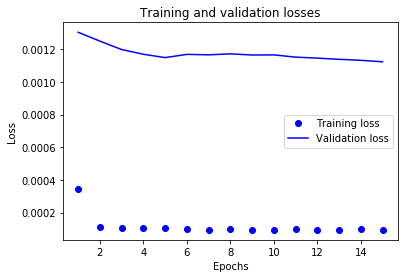

In [120]:
DoThiTiLeLoi(MoHinhmodelDropout5)

In [149]:
modelDropout5.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/modelDropout5.h5')

In [220]:
def create_model(NumFilterN,SizefilterN,PaddingN,PoolSizeN,DropN,HamOptimizerN,StrideN,NumDenseN,NameActifuntion,NumLayerN):
    modelN = Sequential()
    modelN.add(Conv2D(NumFilterN,SizefilterN, strides=StrideN, padding=PaddingN, activation='relu', input_shape=input_shape))
    modelN.add(Conv2D(NumFilterN, SizefilterN, activation='relu'))
    modelN.add(MaxPooling2D(pool_size=PoolSizeN))
    modelN.add(Dropout(DropN))
 
    modelN.add(Conv2D(NumFilterN*2, SizefilterN, strides=StrideN, padding=PaddingN, activation='relu'))
    modelN.add(Conv2D(NumFilterN*2, SizefilterN, strides=StrideN, padding=PaddingN, activation='relu'))
    modelN.add(MaxPooling2D(pool_size=PoolSizeN))
    modelN.add(Dropout(DropN))
 
    modelN.add(Conv2D(NumFilterN*2, SizefilterN, strides=StrideN, padding=PaddingN, activation='relu'))
    modelN.add(Conv2D(NumFilterN*2, SizefilterN, strides=StrideN, padding=PaddingN, activation='relu'))
    modelN.add(MaxPooling2D(pool_size=PoolSizeN))
    modelN.add(Dropout(DropN))

 
    modelN.add(Flatten())
    modelN.add(Dense(NumDenseN, activation='relu'))
    modelN.add(Dropout(DropN))
    #modelN.add(Dense(NumDenseN, activation='relu'))
    #modelN.add(Dropout(DropN))
    modelN.add(Dense(70, activation=NameActifuntion))
    #modelN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    if HamOptimizerN=='Adam':
        modelN.compile(optimizer=HamOptimizerN, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
    else:
        modelN.compile(optimizer=HamOptimizerN, loss=losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])
    return modelN

In [223]:
NumFilter =[64]
Sizefilter = [(3,3),(5,5)]
Padding =['same','valid']
PoolSize = [(2,2)]
DropoutRatio = [0.25,0.5]
HamOptimi = ['SGD', 'RMSprop', 'Adam',]
Stride = [1]
NumDense = [512, 1024] 
NameActifuntion =['softmax']
NumConvolution =[0, 4]

64 (3, 3) same (2, 2) 0.25 SGD 1 512 softmax 0
Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 111s 3ms/step - loss: 4.1346 - categorical_accuracy: 0.0290 - val_loss: 3.3752 - val_categorical_accuracy: 0.1256
Epoch 2/15
35133/35133 [==============================] - 77s 2ms/step - loss: 2.7312 - categorical_accuracy: 0.2480 - val_loss: 2.0583 - val_categorical_accuracy: 0.4354
Epoch 3/15
35133/35133 [==============================] - 71s 2ms/step - loss: 1.3653 - categorical_accuracy: 0.5948 - val_loss: 1.2293 - val_categorical_accuracy: 0.6418
Epoch 4/15
35133/35133 [==============================] - 74s 2ms/step - loss: 0.5501 - categorical_accuracy: 0.8239 - val_loss: 0.5817 - val_categorical_accuracy: 0.8049
Epoch 5/15
35133/35133 [==============================] - 71s 2ms/step - loss: 0.2676 - categorical_accuracy: 0.9113 - val_loss: 0.4017 - val_categorical_accuracy: 0.8845
Epoch 6/15
35133/35133 [=======================

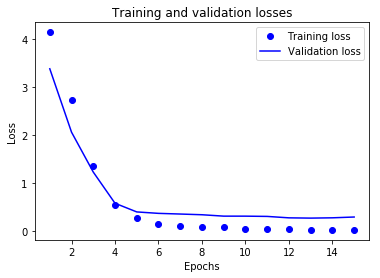

64 (3, 3) same (2, 2) 0.25 SGD 1 512 softmax 4
Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 90s 3ms/step - loss: 3.9205 - categorical_accuracy: 0.0632 - val_loss: 2.5162 - val_categorical_accuracy: 0.3177
Epoch 2/15
35133/35133 [==============================] - 71s 2ms/step - loss: 1.8945 - categorical_accuracy: 0.4441 - val_loss: 1.0336 - val_categorical_accuracy: 0.7088
Epoch 3/15
35133/35133 [==============================] - 71s 2ms/step - loss: 0.7142 - categorical_accuracy: 0.7752 - val_loss: 0.5212 - val_categorical_accuracy: 0.8411
Epoch 4/15
35133/35133 [==============================] - 71s 2ms/step - loss: 0.3140 - categorical_accuracy: 0.8994 - val_loss: 0.3407 - val_categorical_accuracy: 0.8993
Epoch 5/15
35133/35133 [==============================] - 71s 2ms/step - loss: 0.1552 - categorical_accuracy: 0.9475 - val_loss: 0.2724 - val_categorical_accuracy: 0.9267
Epoch 6/15
35133/35133 [========================

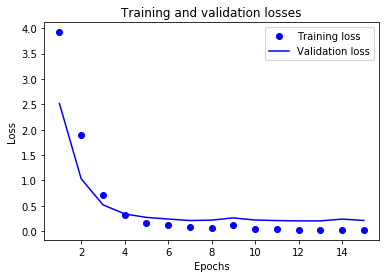

64 (3, 3) same (2, 2) 0.25 SGD 1 1024 softmax 0
Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 103s 3ms/step - loss: 3.8201 - categorical_accuracy: 0.0780 - val_loss: 2.2571 - val_categorical_accuracy: 0.3301
Epoch 2/15
35133/35133 [==============================] - 72s 2ms/step - loss: 1.5689 - categorical_accuracy: 0.5304 - val_loss: 1.0173 - val_categorical_accuracy: 0.6894
Epoch 3/15
35133/35133 [==============================] - 72s 2ms/step - loss: 0.5921 - categorical_accuracy: 0.8170 - val_loss: 0.6507 - val_categorical_accuracy: 0.7991
Epoch 4/15
35133/35133 [==============================] - 72s 2ms/step - loss: 0.2326 - categorical_accuracy: 0.9259 - val_loss: 0.3084 - val_categorical_accuracy: 0.9144
Epoch 5/15
35133/35133 [==============================] - 72s 2ms/step - loss: 0.1834 - categorical_accuracy: 0.9495 - val_loss: 0.2678 - val_categorical_accuracy: 0.9266
Epoch 6/15
35133/35133 [======================

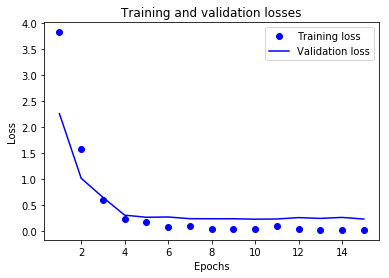

64 (3, 3) same (2, 2) 0.25 SGD 1 1024 softmax 4
Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 80s 2ms/step - loss: 4.0530 - categorical_accuracy: 0.0429 - val_loss: 3.0585 - val_categorical_accuracy: 0.1901
Epoch 2/15
35133/35133 [==============================] - 72s 2ms/step - loss: 2.0125 - categorical_accuracy: 0.4212 - val_loss: 1.7996 - val_categorical_accuracy: 0.4631
Epoch 3/15
35133/35133 [==============================] - 72s 2ms/step - loss: 0.7005 - categorical_accuracy: 0.7861 - val_loss: 0.5497 - val_categorical_accuracy: 0.8173
Epoch 4/15
35133/35133 [==============================] - 72s 2ms/step - loss: 0.2600 - categorical_accuracy: 0.9143 - val_loss: 0.3501 - val_categorical_accuracy: 0.9001
Epoch 5/15
35133/35133 [==============================] - 72s 2ms/step - loss: 0.1317 - categorical_accuracy: 0.9569 - val_loss: 0.3106 - val_categorical_accuracy: 0.9171
Epoch 6/15
35133/35133 [=======================

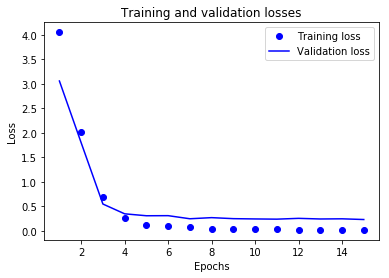

64 (3, 3) same (2, 2) 0.25 RMSprop 1 512 softmax 0
Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 85s 2ms/step - loss: 1.6612 - categorical_accuracy: 0.5825 - val_loss: 0.2582 - val_categorical_accuracy: 0.9232
Epoch 2/15
35133/35133 [==============================] - 72s 2ms/step - loss: 0.1380 - categorical_accuracy: 0.9610 - val_loss: 0.3213 - val_categorical_accuracy: 0.9254
Epoch 3/15
35133/35133 [==============================] - 71s 2ms/step - loss: 0.0719 - categorical_accuracy: 0.9783 - val_loss: 0.3630 - val_categorical_accuracy: 0.9401
Epoch 4/15
35133/35133 [==============================] - 71s 2ms/step - loss: 0.0671 - categorical_accuracy: 0.9815 - val_loss: 0.3465 - val_categorical_accuracy: 0.9402
Epoch 5/15
35133/35133 [==============================] - 72s 2ms/step - loss: 0.0712 - categorical_accuracy: 0.9823 - val_loss: 0.5970 - val_categorical_accuracy: 0.9278
Epoch 6/15
35133/35133 [====================

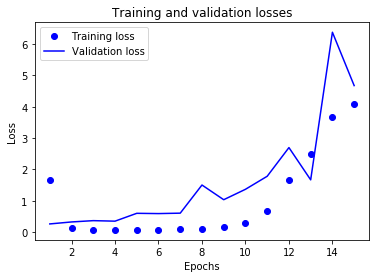

64 (3, 3) same (2, 2) 0.25 RMSprop 1 512 softmax 4
Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 78s 2ms/step - loss: 1.3927 - categorical_accuracy: 0.6457 - val_loss: 0.3831 - val_categorical_accuracy: 0.9031
Epoch 2/15
35133/35133 [==============================] - 71s 2ms/step - loss: 0.1519 - categorical_accuracy: 0.9592 - val_loss: 0.3330 - val_categorical_accuracy: 0.9249
Epoch 3/15
35133/35133 [==============================] - 71s 2ms/step - loss: 0.0888 - categorical_accuracy: 0.9755 - val_loss: 0.3052 - val_categorical_accuracy: 0.9349
Epoch 4/15
35133/35133 [==============================] - 72s 2ms/step - loss: 0.0764 - categorical_accuracy: 0.9811 - val_loss: 0.3578 - val_categorical_accuracy: 0.9396
Epoch 5/15
35133/35133 [==============================] - 73s 2ms/step - loss: 0.0734 - categorical_accuracy: 0.9817 - val_loss: 0.3442 - val_categorical_accuracy: 0.9395
Epoch 6/15
35133/35133 [====================

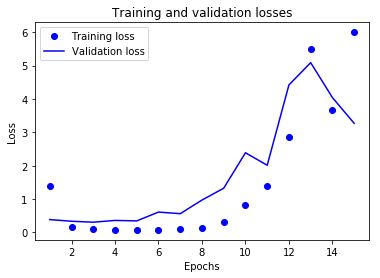

64 (3, 3) same (2, 2) 0.25 RMSprop 1 1024 softmax 0
Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 120s 3ms/step - loss: 1.3138 - categorical_accuracy: 0.6623 - val_loss: 0.6553 - val_categorical_accuracy: 0.8471
Epoch 2/15
35133/35133 [==============================] - 80s 2ms/step - loss: 0.1316 - categorical_accuracy: 0.9643 - val_loss: 0.4733 - val_categorical_accuracy: 0.8900
Epoch 3/15
35133/35133 [==============================] - 75s 2ms/step - loss: 0.0767 - categorical_accuracy: 0.9771 - val_loss: 1.0993 - val_categorical_accuracy: 0.8331
Epoch 4/15
35133/35133 [==============================] - 75s 2ms/step - loss: 0.0676 - categorical_accuracy: 0.9806 - val_loss: 0.5482 - val_categorical_accuracy: 0.9150
Epoch 5/15
35133/35133 [==============================] - 76s 2ms/step - loss: 0.0776 - categorical_accuracy: 0.9830 - val_loss: 0.5377 - val_categorical_accuracy: 0.9238
Epoch 6/15
35133/35133 [==================

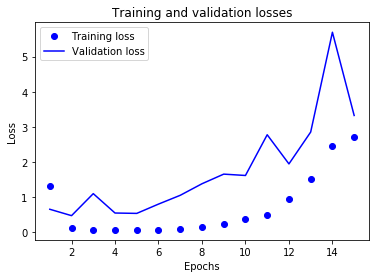

64 (3, 3) same (2, 2) 0.25 RMSprop 1 1024 softmax 4
Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 218s 6ms/step - loss: 1.2972 - categorical_accuracy: 0.6702 - val_loss: 0.4509 - val_categorical_accuracy: 0.8790
Epoch 2/15
35133/35133 [==============================] - 81s 2ms/step - loss: 0.1364 - categorical_accuracy: 0.9622 - val_loss: 0.5266 - val_categorical_accuracy: 0.8844
Epoch 3/15
35133/35133 [==============================] - 76s 2ms/step - loss: 0.0786 - categorical_accuracy: 0.9780 - val_loss: 0.4709 - val_categorical_accuracy: 0.9058
Epoch 4/15
35133/35133 [==============================] - 76s 2ms/step - loss: 0.0743 - categorical_accuracy: 0.9819 - val_loss: 0.6465 - val_categorical_accuracy: 0.9025
Epoch 5/15
35133/35133 [==============================] - 74s 2ms/step - loss: 0.0795 - categorical_accuracy: 0.9818 - val_loss: 0.6610 - val_categorical_accuracy: 0.9068
Epoch 6/15
35133/35133 [==================

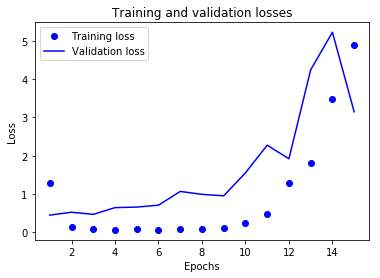

64 (3, 3) same (2, 2) 0.25 Adam 1 512 softmax 0
Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 126s 4ms/step - loss: 0.0074 - categorical_accuracy: 0.5551 - val_loss: 0.0038 - val_categorical_accuracy: 0.8262
Epoch 2/15
35133/35133 [==============================] - 76s 2ms/step - loss: 0.0012 - categorical_accuracy: 0.9464 - val_loss: 0.0021 - val_categorical_accuracy: 0.9103
Epoch 3/15
35133/35133 [==============================] - 72s 2ms/step - loss: 8.3020e-04 - categorical_accuracy: 0.9651 - val_loss: 0.0028 - val_categorical_accuracy: 0.8858
Epoch 4/15
35133/35133 [==============================] - 73s 2ms/step - loss: 9.6390e-04 - categorical_accuracy: 0.9613 - val_loss: 0.0025 - val_categorical_accuracy: 0.9048
Epoch 5/15
35133/35133 [==============================] - 74s 2ms/step - loss: 0.0011 - categorical_accuracy: 0.9586 - val_loss: 0.0034 - val_categorical_accuracy: 0.8733
Epoch 6/15
35133/35133 [==============

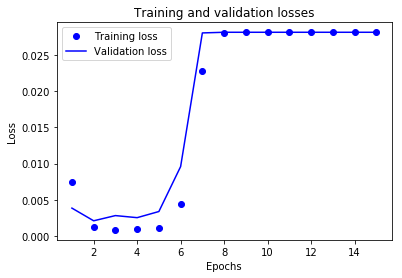

64 (3, 3) same (2, 2) 0.25 Adam 1 512 softmax 4
Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 133s 4ms/step - loss: 0.0107 - categorical_accuracy: 0.3356 - val_loss: 0.0058 - val_categorical_accuracy: 0.7145
Epoch 2/15
35133/35133 [==============================] - 78s 2ms/step - loss: 0.0028 - categorical_accuracy: 0.8723 - val_loss: 0.0035 - val_categorical_accuracy: 0.8333
Epoch 3/15
35133/35133 [==============================] - 76s 2ms/step - loss: 0.0014 - categorical_accuracy: 0.9391 - val_loss: 0.0032 - val_categorical_accuracy: 0.8610
Epoch 4/15
35133/35133 [==============================] - 73s 2ms/step - loss: 9.9108e-04 - categorical_accuracy: 0.9575 - val_loss: 0.0028 - val_categorical_accuracy: 0.8747
Epoch 5/15
35133/35133 [==============================] - 73s 2ms/step - loss: 9.0558e-04 - categorical_accuracy: 0.9619 - val_loss: 0.0033 - val_categorical_accuracy: 0.8627
Epoch 6/15
35133/35133 [==============

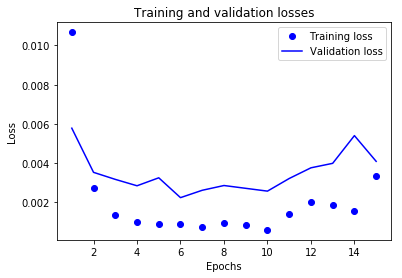

64 (3, 3) same (2, 2) 0.25 Adam 1 1024 softmax 0
Train on 35133 samples, validate on 11804 samples
Epoch 1/15
35133/35133 [==============================] - 477s 14ms/step - loss: 0.0138 - categorical_accuracy: 0.0687 - val_loss: 0.0109 - val_categorical_accuracy: 0.4048
Epoch 2/15
35133/35133 [==============================] - 141s 4ms/step - loss: 0.0041 - categorical_accuracy: 0.7918 - val_loss: 0.0027 - val_categorical_accuracy: 0.8761
Epoch 3/15
35133/35133 [==============================] - 90s 3ms/step - loss: 0.0011 - categorical_accuracy: 0.9505 - val_loss: 0.0020 - val_categorical_accuracy: 0.9115
Epoch 4/15
35133/35133 [==============================] - 80s 2ms/step - loss: 6.9972e-04 - categorical_accuracy: 0.9694 - val_loss: 0.0016 - val_categorical_accuracy: 0.9325
Epoch 5/15
35133/35133 [==============================] - 77s 2ms/step - loss: 5.4003e-04 - categorical_accuracy: 0.9767 - val_loss: 0.0016 - val_categorical_accuracy: 0.9294
Epoch 6/15
35133/35133 [===========

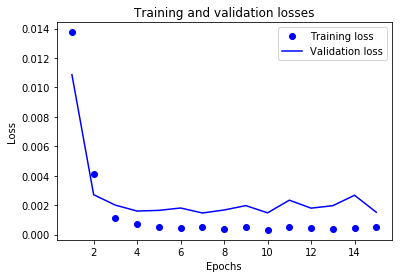

64 (3, 3) same (2, 2) 0.25 Adam 1 1024 softmax 4
Train on 35133 samples, validate on 11804 samples
Epoch 1/15
 7680/35133 [=====>........................] - ETA: 3:30 - loss: 0.0140 - categorical_accuracy: 0.0387

KeyboardInterrupt: 

In [224]:
ArrResultModelTuning=[]
for NumF in range(len(NumFilter)):
    for SizeF in range(len(Sizefilter)):
        for PaddingF in range(len(Padding)):
            for PoolSizeF in range(len(PoolSize)):
                for DroF in range(len(DropoutRatio)):
                    for OptiF in range(len(HamOptimi)):
                        for strideF in range(len(Stride)):
                            for NumDenseF in range(len(NumDense)):
                                for NameActifuntionF in range(len(NameActifuntion)):
                                    for NumConvolutionF in range(len(NumConvolution)):
                                        for batch_S in range(len(NumFilter)):
                                            print(NumFilter[NumF],Sizefilter[SizeF],Padding[PaddingF],PoolSize[PoolSizeF],DropoutRatio[DroF],HamOptimi[OptiF],Stride[strideF],NumDense[NumDenseF],NameActifuntion[NameActifuntionF],NumConvolution[NumConvolutionF])
                                            modelTuning = create_model(NumFilter[NumF],Sizefilter[SizeF],Padding[PaddingF],PoolSize[PoolSizeF],DropoutRatio[DroF],HamOptimi[OptiF],Stride[strideF],NumDense[NumDenseF],NameActifuntion[NameActifuntionF],NumConvolution[NumConvolutionF])
                                            MoHinhmodelTuning = modelTuning.fit(x_train, y_train, batch_size=NumFilter[batch_S], epochs=15, verbose=1, validation_data=(x_test, y_test))
                                            DoThiTiLeLoi(MoHinhmodelTuning)
                                            ArrResultModelTuning.append(MoHinhmodelTuning)

# v. Tổng kết 

## 1. Cùng mô hình

In [244]:
# Tỉ lệ dự đoán đúng trên tập Train
SoLuongDuDoanDungTrain1,SoLuongTongTrain1,TiLeTrain1 = DuDoanFullData(model1,folder_train)
print("Số lượng tổng: ",str(SoLuongTongTrain1)," Số lượng dự đoán đúng: ",str(SoLuongDuDoanDungTrain1)," Tỉ lệ: ",str(TiLeTrain1*100))
# Tỉ lệ dự đoán đúng trên tập Test
SoLuongDuDoanDungTestT1,SoLuongTongTestT1,TiLeTestT1 = DuDoanFullData(model1,folder_test)
print("Số lượng tổng: ",str(SoLuongTongTestT1)," Số lượng dự đoán đúng: ",str(SoLuongDuDoanDungTestT1)," Tỉ lệ: ",str(TiLeTestT1*100))

Số lượng tổng:  35133  Số lượng dự đoán đúng:  34838  Tỉ lệ:  99.16033358950274
Số lượng tổng:  11804  Số lượng dự đoán đúng:  11106  Tỉ lệ:  94.08675025415113


In [242]:
LabelData,LabelPred = DuDoanFullDataRecall(model1,folder_test)

In [243]:
from sklearn.metrics import classification_report
print(classification_report(LabelData,LabelPred))

                     precision    recall  f1-score   support

     Apple Braeburn       0.78      0.75      0.77       164
     Apple Golden 1       0.91      0.76      0.82       164
     Apple Golden 2       0.92      1.00      0.96       164
     Apple Golden 3       0.79      1.00      0.88       161
 Apple Granny Smith       0.96      0.98      0.97       164
        Apple Red 1       0.90      0.68      0.78       164
        Apple Red 2       0.94      0.82      0.88       164
        Apple Red 3       0.89      1.00      0.94       144
Apple Red Delicious       1.00      1.00      1.00       166
   Apple Red Yellow       1.00      0.92      0.96       164
            Apricot       1.00      1.00      1.00       164
            Avocado       1.00      1.00      1.00       143
       Avocado ripe       1.00      1.00      1.00       166
             Banana       1.00      0.85      0.92       166
         Banana Red       0.88      1.00      0.94       166
       Cactus fruit    